# Аналитика коммуникаций в чатах Яндекс.Практикума

**Ход исследования**

В нашем распоряжении датасет с реальными данными из тредов Слака, заказчик исследование - Яндекс.Практикум.

Перед анализом предстоит изучить общую информацию о датасете, выполнить предоработку данных: найти и обработать пропуски, где это необходимо, изучить дубликаты, понять, какая информация есть в столбцах датасета и какого типа данные в них хранятся, изменить тип данных, где необходимо. Добавить новые столбцы.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.

 **Цель исследования** — проанализировать активность в чатах Слака, выяснить, когда активность студентов в чатах наибольшая и когда лучше публиковать анонсы, чтобы получить побольше откликов.

 **Задачи исследования**:

 1. Проанализировать различные типы каналов, когорт, групп; оценить в каких общения больше, в каких меньше, и как они различаются от когорты к когорте, от канала к каналу.
 2. Проанализировать поведение студентов в чатах; выявить паттерны, динамику, цикличность в течение дня, недели, месяца, года; визуализировать свои находки.
 3. Понять, когда активность студентов в чатах наибольшая, и когда лучше публиковать посты/анонсы, чтобы получить больше откликов.

### 1. Обзор данных

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
sns.set_color_codes('pastel')
sns.set_style('darkgrid')
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.simplefilter('ignore')

In [ ]:
try: # мой путь
    chats = pd.read_csv('C:\\Users\\Olesya\\Desktop\\учёба\\Проекты\\Проект_Мастерской_ Аналитика коммуникаций в чатах Практикума\\chat_data_clean.csv')
except: # яндексовский путь
    chats = pd.read_csv('/datasets/chat_data_clean.csv')
chats.head(10)

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""o9ePU9SD0Uf6Jx2rJtYKAw"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>chat_data_clean.csv - Google Drive</title><meta property=""og:title"" content=""chat_data_clean.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1LM6Ax4JpWlG1OSdX9bcQrssaJZKfPNNc/view?usp=sharing&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""o9ePU9SD0Uf6Jx2rJtYKAw""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.LA_tIyToxxs.L.X.O/am=AAAB/d=0/rs=AO0039ulrw9B3L4NkPzUfLiZ_E8pAmNgSw"" nonce=""o9ePU9SD0Uf6Jx2rJtYKAw""><script nonce=""TZshDnwTXL4ghRr271ifRw"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-fe-re:3,docs-fl:1,docs-l1lc:2,"docs-l1lm:""IAD""",...,0.86,0.87,0.88,0.89,1].11,[[null.2,null.204,null.205,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.fnClKEjbOGI.es5.O/rt=j/m=qabr,q_dnp,qapid/exm=qaaw,qadd,qaid,qein,qhaw,qhba,qhbr,qhch,qhga,qhid,qhin,qhpr/d=1/ed=1/rs=AA2YrTtl0TXv7bY2fDroehoU7vFTrgVpRA]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,var ta,La,Ma,Na,Pa,Va,Xa,Wa,Za,$a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,_.fa=function(){return ca?!!_.da&&0<_.da.brand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"_.oa=function(){return _.fa()?_.ea(""Chromium"")...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"_.wa=function(){return _.ra()?""Windows""===_.da...",d=0;d<b;d++)c[d]=a[d];return c}return[]};_.ya=...,c=0,d=a.length-10240;c<d;)b+=String.fromCharCode.a...,a.subarray(c,c+=10240));b+=String.fromCharCode.apply(null,c?a.subarray(c):a);return btoa(b)};,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,_.Da=function(a){return Ca&&null!=a&&a instanc...,b){if(_.Ea)return a[_.Ea]|=b;if(void 0!==a.wb)...,{wb:{value:b,configurable:!0,writable:!0,enumerable:!1}});return b};_.Ia=function(a,b){var c=_.Ga(a);(c&b)!==b&&(Object.isFrozen(a...,_.Ha(a,c|b));return a};_.Ga=function(a){var b;_.Ea?b=...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26533 non-null  int64  
 1   client_msg_id  18262 non-null  object 
 2   type           26533 non-null  object 
 3   user           23643 non-null  object 
 4   ts             26533 non-null  float64
 5   latest_reply   2303 non-null   float64
 6   team           15857 non-null  object 
 7   thread_ts      18222 non-null  float64
 8   subtype        8317 non-null   object 
 9   channel        26533 non-null  object 
 10  file_date      26533 non-null  object 
 11  attachments    26533 non-null  int64  
 12  reactions      4169 non-null   object 
 13  text_len       26533 non-null  int64  
 14  text_words     26533 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 3.0+ MB


Нам предстоит исследовать 26533 сообщений из чатов Слака и Пачки.

Для анализа у нас есть 15 столбцов со следующей информацией (файл chat_data_clean.csv):

- Unnamed: 0 - индекс (можно удалить)
- client_msg_id - id сообщения
- type - тип поста
- user - id пользователя
- ts - дата поста
- latest_reply - дата ответа
- team - факт вхождения в неизветсную группу (?)
- thread_ts - дата треда
- subtype - метка действий пользователя
- channel - канал
- file_date - дата файла
- attachments - прикрепленные файлы
- reactions - реакции
- text_len - длинна текста сообщения
- text_words - количество слов в сообщении

Значения датасета хранят значения с тремя типами данных: категориальный, целые числа, вещественные числа.

Удалим столбец Индекс, потому что он не несет никакой важности для анализа.

<font size=4 color='#71C9CE'>  Можно так удалить pd.read_csv('chat_data_clean.csv', index_col=0, nrows=3)<font>

In [ ]:
chats = chats.drop(['Unnamed: 0'], axis=1)
chats

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,1.669643e+09,1.669645e+09,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,1.669645e+09,NaN,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,1.669647e+09,NaN,NaN,NaN,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,1.669709e+09,1.669719e+09,NaN,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,1.669711e+09,NaN,TPV9DP0N4,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,1.669816e+09,NaN,NaN,NaN,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,1.670506e+09,NaN,TPV9DP0N4,NaN,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,1.670605e+09,NaN,TPV9DP0N4,NaN,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,NaN,message,U04H3QE10EM,1.674485e+09,NaN,NaN,NaN,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


Преобразуем столбцы, хранящие информацию о Дате поста, Дате ответа, Дате треда и Дате файла в формат даты и времени.

In [ ]:
chats['ts'] = pd.to_datetime(chats['ts'], unit='s').dt.round('1s')
chats['latest_reply'] = pd.to_datetime(chats['latest_reply'], unit='s').dt.round('1s')
chats['thread_ts'] = pd.to_datetime(chats['thread_ts'], unit='s').dt.round('1s')
chats['file_date'] = pd.to_datetime(chats['file_date'])
chats

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,2022-11-29 08:08:12,2022-11-29 10:56:57,NaN,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,TPV9DP0N4,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,NaN,NaT,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,NaN,NaT,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


In [ ]:
chats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_msg_id  18262 non-null  object        
 1   type           26533 non-null  object        
 2   user           23643 non-null  object        
 3   ts             26533 non-null  datetime64[ns]
 4   latest_reply   2303 non-null   datetime64[ns]
 5   team           15857 non-null  object        
 6   thread_ts      18222 non-null  datetime64[ns]
 7   subtype        8317 non-null   object        
 8   channel        26533 non-null  object        
 9   file_date      26533 non-null  datetime64[ns]
 10  attachments    26533 non-null  int64         
 11  reactions      4169 non-null   object        
 12  text_len       26533 non-null  int64         
 13  text_words     26533 non-null  int64         
dtypes: datetime64[ns](4), int64(3), object(7)
memory usage: 2.8+ MB


Построим гистограммы и попробуем найти интересные особенности в данных.

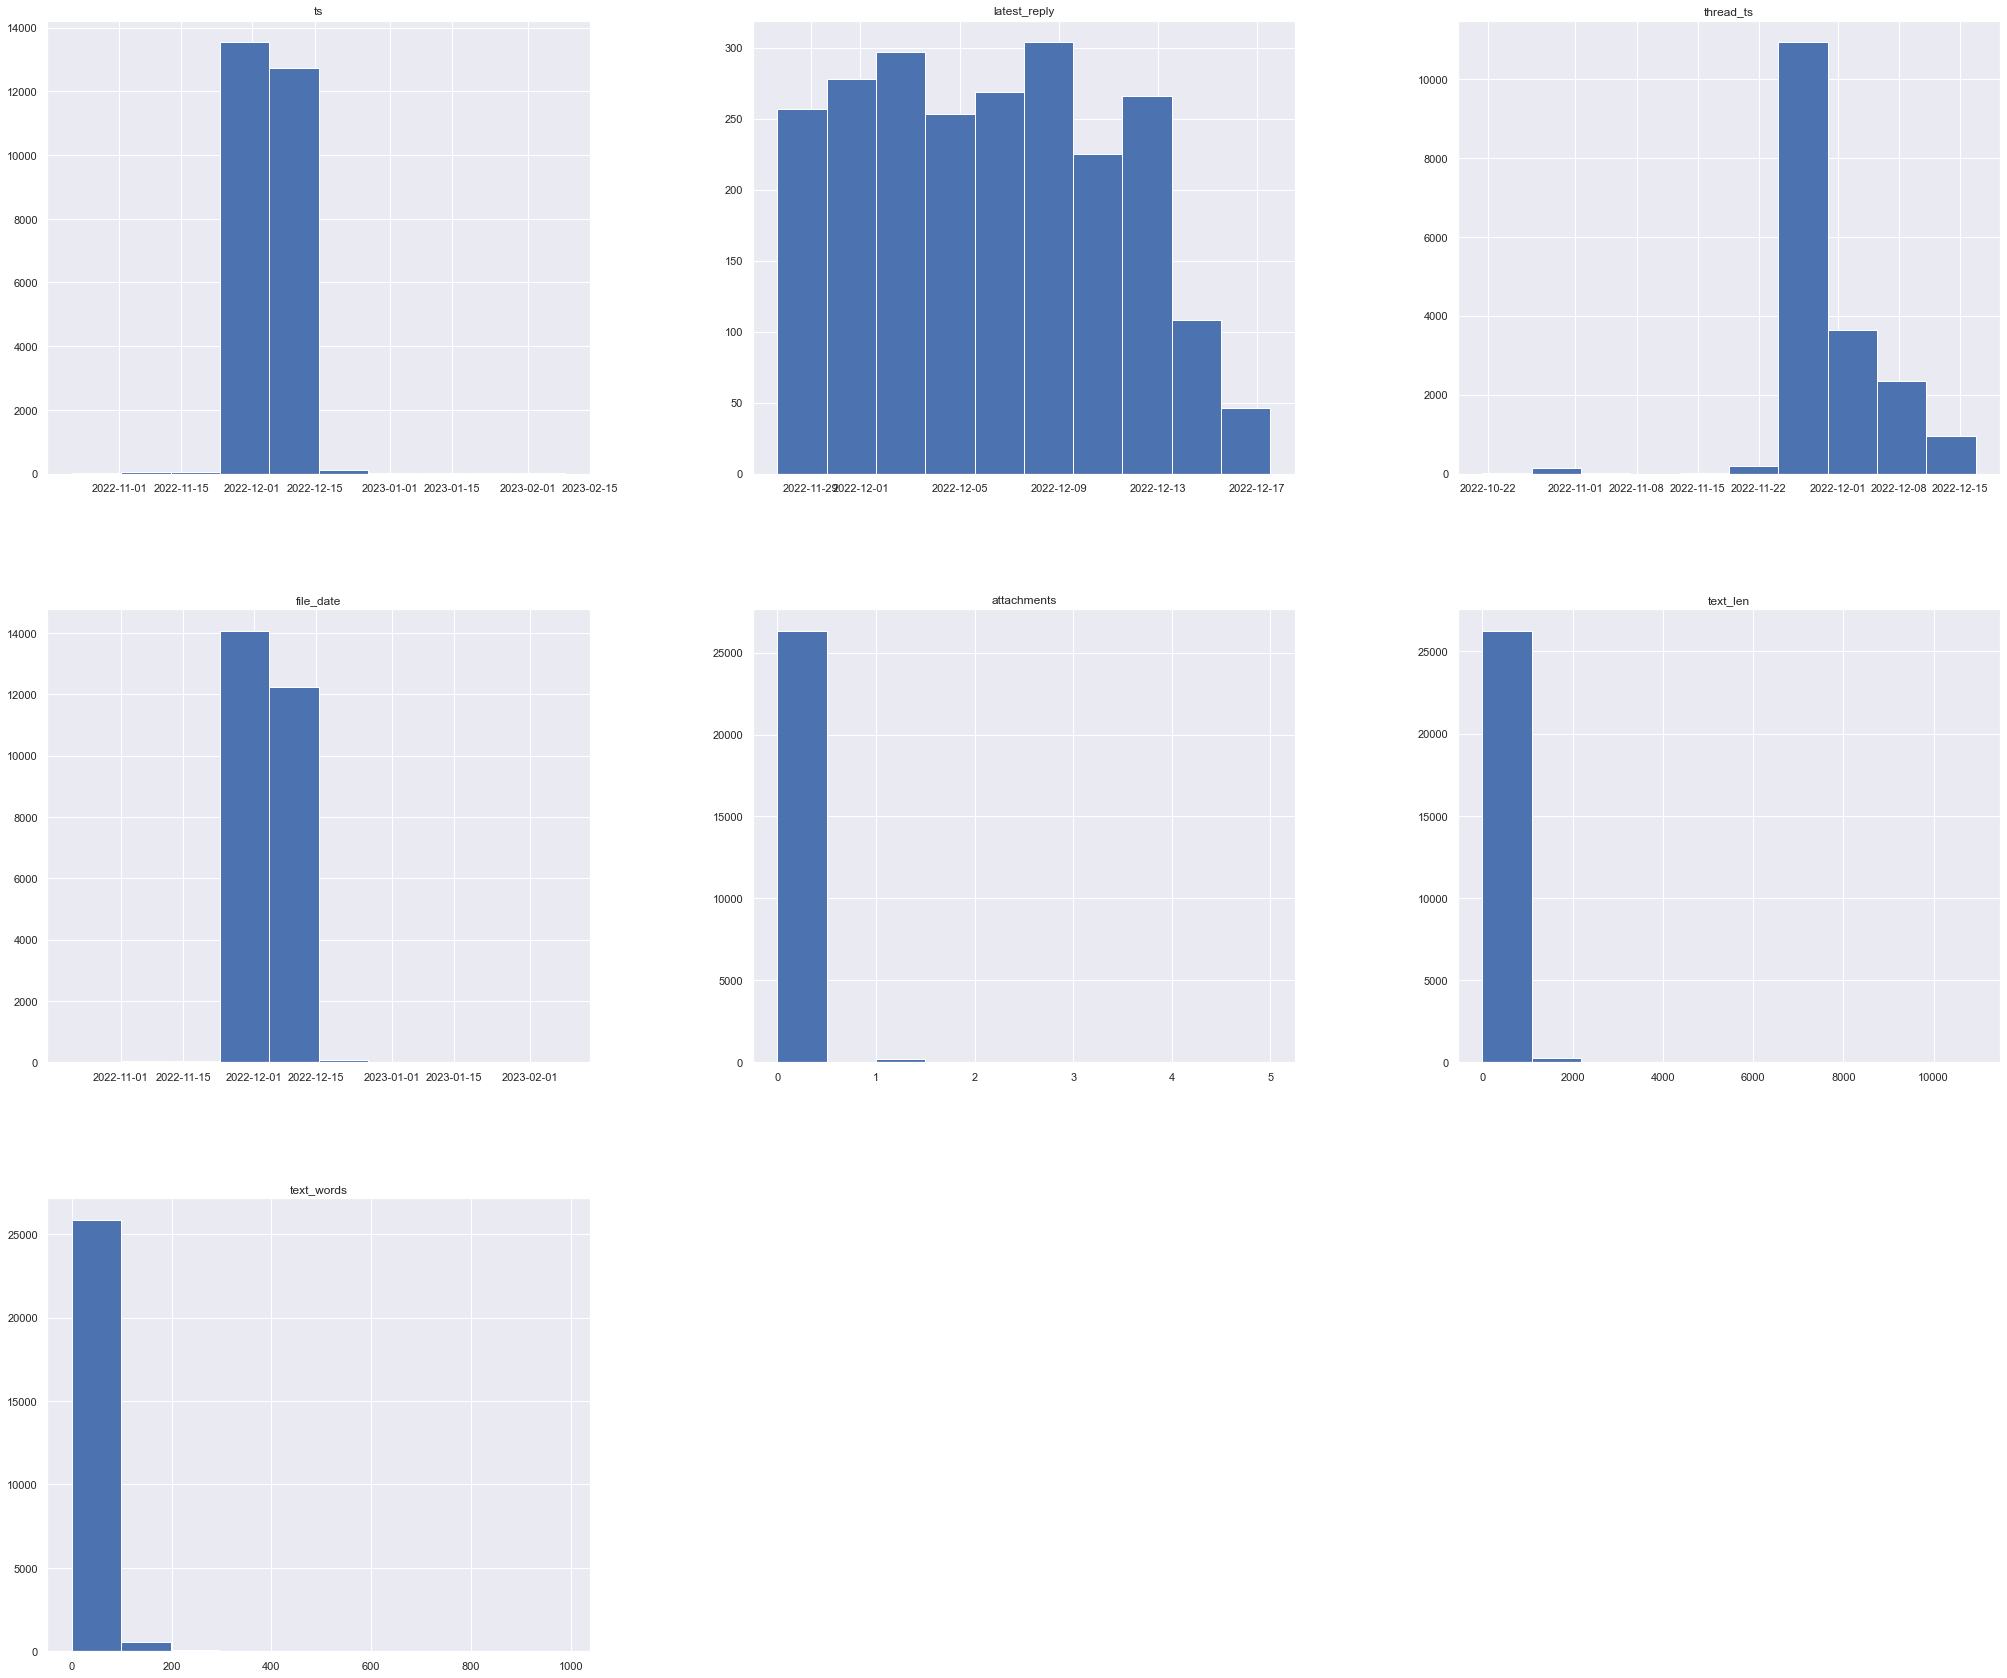

In [ ]:
chats.hist(figsize=(35, 30));

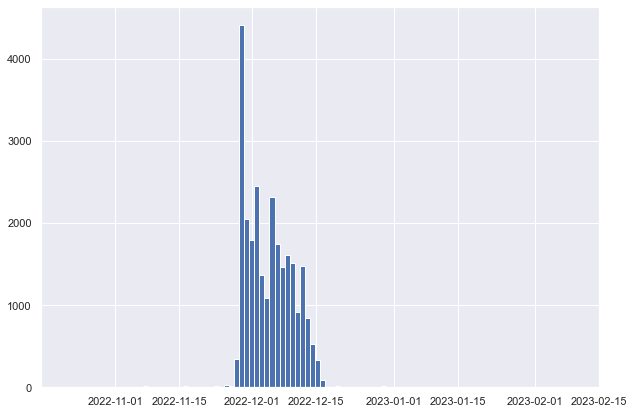

In [ ]:
chats['ts'].hist(figsize=(10, 7), bins=100);

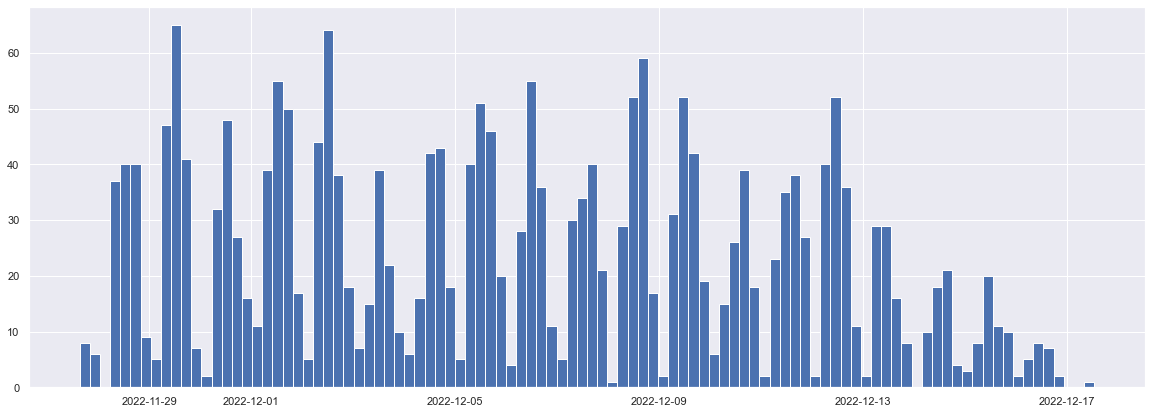

In [ ]:
chats['latest_reply'].hist(figsize=(20, 7), bins=100);

<font size=4 color='#71C9CE'> Очень интеересное наблюдение! <font>

Глядя на графики, предварительно можно обозначить следующие особенности:

- Количество слов в сообщениях крайне редко превышает 100: из 26533 сообщений не более 500 содержат больше 100 слов;
- Длина текста практически во всех сообщениях не превышает 1000 символов;
- Доля сообщений с вложениями нижточно мала, чаще всего вложения прикреплялись с конца ноября по середину декабря 2022 года;
- Активнее всего треды создавались в последние числа ноября 2022 года, в этот период их число достигало почти 11000 сообщений. Далее примерно до 17 декабря количество сообщений сошло почти на нет;
- Похожая ситуация с публикацией постов: пик(это около 70 сообщений в день) пришелся на самый конец ноября, а далее постепенно снижался и к середине декабря активность снизилась до нескольких сообщений в день;
- Ответы активно публиковались с 20х чисел ноября и до середины декабря 2022 года. Следует отменить скачкообразный характер гистограммы: в этот период количество ответов то достигало 50-70 за день, до снижалось 2-3 сообщений.

### 2. Предоработка данных

#### Обработка пропусков

In [ ]:
pd.DataFrame(round(chats.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
client_msg_id,31.000000
type,0.000000
user,11.000000
ts,0.000000
latest_reply,91.000000
team,40.000000
thread_ts,31.000000
subtype,69.000000
channel,0.000000
file_date,0.000000


В данных обнаружены пропуски в следующих столбцах:

- Дата ответа 91%
- Реакции - 84%
- Метка действий пользователя - 69%

Чуть меньше пропусков в:

- Факт вхождения в неизветсную группу (?) - 40%
- id сообщения - 31%
- Дата треда - 31%
- id пользователя - 11%.

Посмотрим на содержание этих столбцов и попробуем выяснить с чем может быть связано появление пропусков.

In [ ]:
chats.isna().sum()

client_msg_id     8271
type                 0
user              2890
ts                   0
latest_reply     24230
team             10676
thread_ts         8311
subtype          18216
channel              0
file_date            0
attachments          0
reactions        22364
text_len             0
text_words           0
dtype: int64

Посмотрим на пропуски в столбце Дата ответа.

In [ ]:
chats[chats['latest_reply'].isna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,TPV9DP0N4,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
5,NaN,message,U0421JZP400,2022-11-29 10:19:47,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-29,0,NaN,37,5
6,NaN,message,U02Q4P6SGBC,2022-11-29 10:19:48,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-29,0,NaN,37,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,NaN,NaT,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,NaN,NaT,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


Всего около 2000 сообщений с ответами. Пока сложно сказать однозначно, почему в столбце Дата ответа так много пропусков: возможно большинство сообщений просто остаются без ответа, а возможно это какая-то техническая ошибка. Поэтому оставим пропуски в этом столбце без изменений.

Посмотрим на пропуски в столбце Реакции.

In [ ]:
chats[chats['reactions'].isna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,TPV9DP0N4,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
5,NaN,message,U0421JZP400,2022-11-29 10:19:47,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-29,0,NaN,37,5
6,NaN,message,U02Q4P6SGBC,2022-11-29 10:19:48,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-29,0,NaN,37,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,NaN,NaT,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,NaN,NaT,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


Скорее всего пропуски говорят лишь о том, что пользовател не поставил реакцию на сообщение, поэтому заменим пропуски в этом столбце на значение "0".

In [ ]:
chats['reactions'] = chats['reactions'].fillna('0')

Изучим пропуски в толбце Метка действий пользователя.

In [ ]:
chats['subtype'].unique()

array([nan, 'channel_join', 'bot_remove', 'thread_broadcast',
       'channel_unarchive', 'channel_leave', 'bot_message',
       'channel_purpose', 'tombstone', 'channel_name'], dtype=object)

Тоже никаких сюрпризов, сообщения без метки пометим как "без метки".

In [ ]:
chats['subtype'] = chats['subtype'].fillna('без метки')

Посмотрим на значения и пропуски в загадочном столбце team.

In [ ]:
chats['team'].unique()

array(['TPV9DP0N4', nan], dtype=object)

In [ ]:
chats[chats['team'].notna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,TPV9DP0N4,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,0,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,TPV9DP0N4,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,TPV9DP0N4,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,0,19,2
7,6a730fa5-7934-41f4-96f0-aa04787bce8e,message,U03DZHHUACW,2022-11-29 10:26:46,2022-11-29 12:08:02,TPV9DP0N4,2022-11-29 10:26:46,без метки,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U0421JZP...",469,48
9,031b6894-db20-4844-91e4-7c6324351365,message,U040E2D6CF2,2022-11-29 10:56:57,NaT,TPV9DP0N4,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26521,d3a1c647-f815-4d7e-bbee-c5ebbb6e3c4d,message,U045ZBAM1JA,2022-12-03 18:07:05,NaT,TPV9DP0N4,2022-12-03 12:15:05,без метки,sql_teamwork_03,2022-12-03,0,0,45,6
26523,c16d32c0-0f5e-48bf-9aec-1751f7c02674,message,U02JSUUMARF,2022-12-07 08:02:01,NaT,TPV9DP0N4,2022-12-07 02:01:54,без метки,sql_teamwork_03,2022-12-07,0,0,71,11
26524,9224f67b-ce71-4ea2-adcb-f47862895977,message,U04152HKDHN,2022-12-07 08:32:05,NaT,TPV9DP0N4,2022-12-07 02:01:54,без метки,sql_teamwork_03,2022-12-07,0,"[{'name': 'cat-high-five', 'users': ['U044T2TL...",41,8
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,без метки,sql_teamwork_new,2022-12-08,0,0,340,53


Наберемся смелости выдвинуть предположение, что в столбце Team указана принадлежность к команде Практикума. Поэтому изменим значения в столбце на булевы: если сообщение написано членом команды, вернётся значение True, если нет - False.

In [ ]:
def team_func(row):
    try:
        if 'TPV9DP0N4' in row:
            return 'True'
    except:
        return 'False'

In [ ]:
chats['team'] = chats['team'].apply(team_func)

Изучим пропуски в столбце id сообщения.

In [ ]:
chats[chats['client_msg_id'].notna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,True,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,0,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,True,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,2022-11-29 08:08:12,2022-11-29 10:56:57,False,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,True,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,0,19,2
7,6a730fa5-7934-41f4-96f0-aa04787bce8e,message,U03DZHHUACW,2022-11-29 10:26:46,2022-11-29 12:08:02,True,2022-11-29 10:26:46,без метки,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U0421JZP...",469,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,c16d32c0-0f5e-48bf-9aec-1751f7c02674,message,U02JSUUMARF,2022-12-07 08:02:01,NaT,True,2022-12-07 02:01:54,без метки,sql_teamwork_03,2022-12-07,0,0,71,11
26524,9224f67b-ce71-4ea2-adcb-f47862895977,message,U04152HKDHN,2022-12-07 08:32:05,NaT,True,2022-12-07 02:01:54,без метки,sql_teamwork_03,2022-12-07,0,"[{'name': 'cat-high-five', 'users': ['U044T2TL...",41,8
26525,ac150123-309f-40ae-a787-f647ab4a76d9,message,U045ZBAM1JA,2022-12-08 16:11:28,NaT,False,NaT,без метки,sql_teamwork_03,2022-12-08,0,0,80,13
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,True,NaT,без метки,sql_teamwork_new,2022-12-08,0,0,340,53


In [ ]:
df_1 = chats[chats['client_msg_id'].notna()]
df_2 = df_1[df_1['subtype'] == 'без метки']
df_2[['client_msg_id', 'subtype']].head(20)

,client_msg_id,subtype
0,ae31e785-257b-4290-a4c6-9721337f67ea,без метки
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,без метки
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,без метки
4,b5e3413b-8f04-4192-948b-2423eb3192b2,без метки
7,6a730fa5-7934-41f4-96f0-aa04787bce8e,без метки
8,19e7fd69-a6d9-42aa-acbf-722eebe78fc6,без метки
9,031b6894-db20-4844-91e4-7c6324351365,без метки
10,62e3fb53-d855-4000-8326-a3ae8e8e2b79,без метки
11,e432bd86-a6b9-40b2-8878-1b96a9134878,без метки
12,dac1d546-cbfa-4517-87b9-e63a16ddf4c4,без метки


Предположим, что пропуски в столбце id сообщения появляются в том случае, если сообщение имеет какую-нибудь метку действий пользователя. Оставим данные пропуски без изменений.

Пропуски в столбце Дата треда скорее всего обусловлены тем, что сообщение не имело отношения к треду. Данные пропуски так же оставим без изменений.

In [ ]:
chats[chats['thread_ts'].isna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,False,NaT,channel_join,data-analysts-bus,2022-11-28,0,0,37,5
5,NaN,message,U0421JZP400,2022-11-29 10:19:47,NaT,False,NaT,channel_join,data-analysts-bus,2022-11-29,0,0,37,5
6,NaN,message,U02Q4P6SGBC,2022-11-29 10:19:48,NaT,False,NaT,channel_join,data-analysts-bus,2022-11-29,0,0,37,5
18,75d34da5-6e41-47c4-ae9d-212ef50633be,message,U040E2D6CF2,2022-11-30 10:48:14,NaT,True,NaT,без метки,data-analysts-bus,2022-11-30,0,"[{'name': 'woman-running', 'users': ['U03JYMWQ...",91,9
19,72a866c9-dcab-4b9a-9481-2ead6115b2d7,message,U040E2D6CF2,2022-11-30 11:04:01,NaT,True,NaT,без метки,data-analysts-bus,2022-11-30,0,0,813,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,False,NaT,channel_join,sql_teamwork_new,2022-11-30,0,0,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,True,NaT,без метки,sql_teamwork_new,2022-12-08,0,0,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,True,NaT,без метки,sql_teamwork_new,2022-12-09,0,0,110,5
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,False,NaT,channel_join,sql_teamwork_new,2023-01-23,0,0,37,5


Рассмотрим пропуски в столбце id пользователя.

In [ ]:
chats[chats['user'].isna()]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
520,NaN,message,NaN,2022-11-28 07:00:57,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,0,76,12
521,NaN,message,NaN,2022-11-28 07:00:57,2022-11-28 12:34:02,False,2022-11-28 07:00:57,bot_message,da_53_exerciser_1,2022-11-27,0,0,93,15
522,NaN,message,NaN,2022-11-28 07:00:58,2022-12-08 14:12:27,False,2022-11-28 07:00:58,bot_message,da_53_exerciser_1,2022-11-27,0,0,80,13
523,NaN,message,NaN,2022-11-28 07:00:58,2022-12-07 14:14:53,False,2022-11-28 07:00:58,bot_message,da_53_exerciser_1,2022-11-27,0,0,138,18
524,NaN,message,NaN,2022-11-28 07:00:58,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,0,121,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26170,NaN,message,NaN,2022-12-05 08:01:07,NaT,False,NaT,bot_message,ds_plus_19_projects,2022-12-05,0,0,60,7
26171,NaN,message,NaN,2022-12-05 08:01:07,NaT,False,NaT,bot_message,ds_plus_19_projects,2022-12-05,0,0,99,12
26172,NaN,message,NaN,2022-12-05 08:01:07,NaT,False,NaT,bot_message,ds_plus_19_projects,2022-12-05,0,0,113,15
26173,NaN,message,NaN,2022-12-05 08:01:08,NaT,False,NaT,bot_message,ds_plus_19_projects,2022-12-05,0,0,45,6


Из таблицы видно, что все сообщения с пропуском в поле Пользователь имеют метку bot_message. Предположительно данные сообщения написаны ботом.

In [ ]:
chats['user'] = chats['user'].fillna('bot')

В ходе обработки пропусков, были произведены следующие действия с данными:

- Пропуски в столбце Дата ответа было решено оставить без изменений. Только около 2000 сообщений оказались с ответами. Пока сложно сказать однозначно, почему в столбце Дата ответа так много пропусков: возможно большинство сообщений просто остаются без ответа, а возможно это какая-то техническая ошибка;
- Пропуски в столбце Реакции заменим на значение "нет реакции". Скорее всего пропуски говорят лишь о том, что пользователь не поставил реакцию на сообщение;
- В столбце Subtype, сообщения с пропусками пометим как "без метки";
- Наберемся смелости выдвинуть предположение, что в столбце Team указана принадлежность к команде Практикума. Поэтому изменим значения в столбце на булевы: если сообщение написано членом команды, вернётся значение True, если нет - False;
- Предположим, что пропуски в столбце id сообщения появляются в том случае, если сообщение имеет какую-нибудь метку действий пользователя, то есть относится к, так называемым "техническим сообщениям". Оставим данные пропуски без изменений;
- Пропуски в столбце Дата треда скорее всего обусловлены тем, что сообщение не имело отношения к треду. Данные пропуски так же оставим без изменений;
- Из таблицы видно, что все сообщения с пропуском в поле Пользователь имеют метку bot_message. Предположительно данные сообщения написаны ботом. Изменим пропуски на значение "bot".

#### Обработка дубликатов

In [ ]:
print(f'Количество полных дубликатов: {chats.duplicated().sum()}')

Количество полных дубликатов: 369


In [ ]:
chats[chats.duplicated(keep=False)]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
535,NaN,message,bot,2022-11-28 07:01:02,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,0,101,17
536,NaN,message,bot,2022-11-28 07:01:02,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,0,101,17
546,NaN,message,bot,2022-11-28 07:01:05,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,"[{'name': 'heavy_check_mark', 'users': ['U02Q3...",118,20
548,NaN,message,bot,2022-11-28 07:01:05,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,"[{'name': 'heavy_check_mark', 'users': ['U02Q3...",118,20
549,NaN,message,bot,2022-11-28 07:01:06,NaT,False,NaT,bot_message,da_53_exerciser_1,2022-11-27,0,"[{'name': 'heavy_check_mark', 'users': ['U02Q3...",118,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26023,NaN,message,bot,2022-12-05 08:05:38,NaT,False,NaT,bot_message,ds_plus_19_exerciser,2022-12-05,0,0,68,10
26024,NaN,message,bot,2022-12-05 08:05:38,NaT,False,NaT,bot_message,ds_plus_19_exerciser,2022-12-05,0,0,68,10
26025,NaN,message,bot,2022-12-05 08:05:39,NaT,False,NaT,bot_message,ds_plus_19_exerciser,2022-12-05,0,0,78,12
26026,NaN,message,bot,2022-12-05 08:05:39,NaT,False,NaT,bot_message,ds_plus_19_exerciser,2022-12-05,0,0,78,12


In [ ]:
chats = chats.drop_duplicates()
print(f'Количество полных дубликатов: {chats.duplicated().sum()}')

Количество полных дубликатов: 0


In [ ]:
chats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26164 entries, 0 to 26532
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_msg_id  18262 non-null  object        
 1   type           26164 non-null  object        
 2   user           26164 non-null  object        
 3   ts             26164 non-null  datetime64[ns]
 4   latest_reply   2303 non-null   datetime64[ns]
 5   team           26164 non-null  object        
 6   thread_ts      18222 non-null  datetime64[ns]
 7   subtype        26164 non-null  object        
 8   channel        26164 non-null  object        
 9   file_date      26164 non-null  datetime64[ns]
 10  attachments    26164 non-null  int64         
 11  reactions      26164 non-null  object        
 12  text_len       26164 non-null  int64         
 13  text_words     26164 non-null  int64         
dtypes: datetime64[ns](4), int64(3), object(7)
memory usage: 3.0+ MB


Посмотрим на данные с целью поиска неявных дубликатов.

In [ ]:
chats['client_msg_id'].unique()

array(['ae31e785-257b-4290-a4c6-9721337f67ea',
       '7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d', nan, ...,
       'ac150123-309f-40ae-a787-f647ab4a76d9',
       'd7cdfd29-40a3-4f22-b3ce-755975902652',
       'b403e184-0a77-42ff-96ee-8813a06c387e'], dtype=object)

In [ ]:
chats['client_msg_id'].value_counts(ascending=False)

ae31e785-257b-4290-a4c6-9721337f67ea    1
1d7bbb29-e1b9-4869-97cd-dc2751b9a116    1
7fa882f4-f62c-49d2-bc9e-6421d003f149    1
7A947BF1-58CD-4B78-B0C8-4E775DDD5F9C    1
95f1af21-5e6e-432e-8352-d70f6a6f498c    1
                                       ..
03481781-D9FF-424A-9A44-085227EE33C3    1
686fb200-7d71-4ea4-bb40-a560df977335    1
2a8f9fee-244f-4737-a1c8-1334f6e4731a    1
9e7e6cc5-10d6-4ee1-9cba-0299a5df56d5    1
b403e184-0a77-42ff-96ee-8813a06c387e    1
Name: client_msg_id, Length: 18262, dtype: int64

In [ ]:
chats['type'].unique()

array(['message'], dtype=object)

In [ ]:
chats['type'].value_counts(ascending=False)

message    26164
Name: type, dtype: int64

In [ ]:
chats['user'].unique()

array(['U03JYMWQLP5', 'U03V483FRKM', 'U02KVQJHQ5S', ..., 'U045ZBAM1JA',
       'U044T2TLGH3', 'U04152HKDHN'], dtype=object)

In [ ]:
chats['user'].value_counts(ascending=False)

bot            2521
U02KVQJHQ5S     514
U03F5HNG351     252
U0179RY000Y     236
USWN6S8V6       215
               ... 
U048TBY1D8S       1
U048LPG61AS       1
U04726TNG00       1
U048XUZS3CL       1
U04152HKDHN       1
Name: user, Length: 3192, dtype: int64

In [ ]:
chats['team'].unique()

array(['True', 'False'], dtype=object)

In [ ]:
chats['team'].value_counts(ascending=False)

True     15857
False    10307
Name: team, dtype: int64

In [ ]:
chats['subtype'].unique()

array(['без метки', 'channel_join', 'bot_remove', 'thread_broadcast',
       'channel_unarchive', 'channel_leave', 'bot_message',
       'channel_purpose', 'tombstone', 'channel_name'], dtype=object)

In [ ]:
chats['subtype'].value_counts(ascending=False)

без метки            18216
channel_leave         3265
bot_message           2521
channel_join          2026
thread_broadcast       108
tombstone               14
channel_unarchive       10
channel_purpose          2
bot_remove               1
channel_name             1
Name: subtype, dtype: int64

Столбцы id сообщения, Тип поста, id пользователя, Факт вхождения в команду Практикума (?) и Метка действий пользователя не вызывают вопросов, в них неявных дубликатов не выявлено.

Посмотрим на значения столбца Channel.

In [ ]:
chats['channel'].unique()

array(['data-analysts-bus', 'datatracker_logs', 'data_complaints',
       'data_edteam_info', 'da_42_exerciser_1', 'da_42_exerciser_2',
       'da_42_projects_1', 'da_42_projects_2', 'da_50_info',
       'da_50_library', 'da_50_teamwork', 'da_52_exerciser', 'da_52_info',
       'da_52_library', 'da_52_projects', 'da_52_teamwork',
       'da_53_exerciser_1', 'da_53_exerciser_2', 'da_53_info',
       'da_53_library', 'da_53_projects_1', 'da_53_projects_2',
       'da_53_teamwork', 'da_54_exerciser_01', 'da_54_exerciser_02',
       'da_54_info', 'da_54_library', 'da_54_projects_01',
       'da_54_projects_02', 'da_54_teamwork', 'da_55_exerciser',
       'da_55_info', 'da_55_library', 'da_55_projects', 'da_55_teamwork',
       'da_56b_exerciser', 'da_56b_info', 'da_56b_library',
       'da_56b_projects', 'da_56b_teamwork', 'da_56_exerciser_1',
       'da_56_exerciser_2', 'da_56_info', 'da_56_library',
       'da_56_projects_1', 'da_56_projects_2', 'da_56_teamwork',
       'da_58_digitalpro

Значения очень однородные, содержат информацию о Направлении курса(Аналитика, Инженерия и т.д..), номере когорты и самого названия канала. Сперва вытащим из названий ячеек Направление (Название курса) и вынесем его в новый столбец. Направления будут следующие:

- da - Data Analysis;
- ds - Data Science;
- de - Data Engineering;
- dl - Machine Learning (?);
- sql - SQL.


In [ ]:
def course_func(row):
    try:
        if 'da' in row:
            return 'da'
        if 'data-analysts' in row:
            return 'da'
        if 'de-' in row:
            return 'de'
        if 'de_' in row:
            return 'de'
        if 'ds_' in row:
            return 'ds'
        if 'dl_' in row:
            return 'dl'
        if 'sql' in row:
            return 'sql'
        else: 'other'

    except:
        return 'other'

In [ ]:
chats['course'] = chats['channel'].apply(course_func)

In [ ]:
chats['course'].value_counts()

da     12941
ds      9696
de      1981
dl      1325
sql      207
Name: course, dtype: int64

У нас появился новый столбец с Направлениями.

Теперь добавим столбец только с Названиями каналов (info, exerciser, projects и т.д..). Сохраним его под названием only_channel.

In [ ]:
def only_channel_func(row):
    try:
        if 'info' in row:
            return 'info'
        if 'projects' in row:
            return 'projects'
        if 'exerciser' in row:
            return 'exerciser'
        if 'teamwork' in row:
            return 'teamwork'
        if 'community' in row:
            return 'community'
        if 'masterskaya' in row:
            return 'masterskaya'
        if 'library' in row:
            return 'library'
        if 'mentors' in row:
            return 'mentors'
        if 'feedback' in row:
            return 'student_feedback'
        if 'academ' in row:
            return 'academ'
        if 'teach_me' in row:
            return 'teach_me'
        if 'digital_professions' in row:
            return 'digital_professions'
        if 'tutorial' in row:
            return 'tutorial'
    except:
        return 'other'

In [ ]:
chats['only_channel'] = chats['channel'].apply(only_channel_func)

In [ ]:
chats['only_channel'].value_counts()

projects               7274
exerciser              6556
teamwork               4285
info                   3864
library                1019
community               679
teach_me                572
tutorial                155
masterskaya              71
student_feedback         64
academ                   36
digital_professions      31
mentors                  15
Name: only_channel, dtype: int64

In [ ]:
chats['channel'].value_counts(ascending=False).head(30)

ds_55_projects_1        550
ds_46_exerciser         504
ds_55_teamwork          452
da_60_projects_02       442
da_59_exerciser_02      418
ds_57_teamwork          411
da_59_exerciser_03      382
da_plus_18_teamwork     381
da_59_exerciser_01      362
ds_55_projects_2        355
da_61_teamwork          339
da_60_projects_01       310
da_54_projects_01       300
da_59_teamwork          296
da_55_projects          280
ds_58_projects_2        278
da_plus_17_exerciser    271
da_62_projects_2        265
ds_55_info              241
ds_57_projects_1        241
da_59b_exerciser        240
da_60_teamwork          239
ds_57_projects_2        234
da_60_projects_03       233
ds_49_projects          228
dl_06_teach_me          228
da_63_projects_1        214
dl_05_community         208
da_53_exerciser_2       203
ds_plus_15_teamwork     201
Name: channel, dtype: int64

Посмотрим, на данные столбца Реакции.

In [ ]:
chats['reactions'].unique()

array(['0', "[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U040E2D6CF2'], 'count': 1}]",
       ..., "[{'name': 'pray', 'users': ['U03RSC0RSBU'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U02QK4VR38F'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U044T2TLGH3'], 'count': 1}]"],
      dtype=object)

In [ ]:
chats['reactions'].value_counts(ascending=False)

0                                                                                                                                                                                                                                                                                                                                                        21999
[{'name': 'checked', 'users': ['U040FP9JRNF'], 'count': 1}]                                                                                                                                                                                                                                                                                                220
[{'name': 'cat-high-five', 'users': ['U02PLR8QYT0'], 'count': 1}]                                                                                                                                                                                                                                         

Из всех данных извлечем количество реакций у каждого сообщения и выделим эту информацию в новый столбец.

In [ ]:
chats['reactions_number'] = chats['reactions'].str.split(':').str[-1]
chats['reactions_number'] = chats['reactions_number'].str.replace(r'\D+','', regex=True).str[-1].fillna(0).astype(int)
chats

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words,course,only_channel,reactions_number
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,True,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,0,297,47,da,None,0
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,True,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63,da,None,1
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,False,NaT,channel_join,data-analysts-bus,2022-11-28,0,0,37,5,da,None,0
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,2022-11-29 08:08:12,2022-11-29 10:56:57,False,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12,da,None,1
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,True,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,0,0,19,2,da,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,False,NaT,channel_join,sql_teamwork_new,2022-11-30,0,0,37,5,sql,teamwork,0
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,True,NaT,без метки,sql_teamwork_new,2022-12-08,0,0,340,53,sql,teamwork,0
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,True,NaT,без метки,sql_teamwork_new,2022-12-09,0,0,110,5,sql,teamwork,0
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,False,NaT,channel_join,sql_teamwork_new,2023-01-23,0,0,37,5,sql,teamwork,0


- В ходе обработки дубликатов было выявлено 369 полных дубликата, от которых мы благополучно избавились. Все дубликаты имели метку  bot_message.
- Неявных дубликатов в данных не оказалось.
- Столбец Reactions содержит данные о пользователе, оставившем реакцию, самой реакции и об общем количестве реакций. Было принято решение создать новый столбец и и поместить туда информацию об общем количестве реакций. Столбец получил название reactions_number.
- Столбец Channel так же содержит неоднородную информацию, в которую входит информация о Направлении курса(Аналитика, Инженерия и т.д..), номере когорты и самого названия канала.
- Используя информацию из колонки channel было создано 2 новых столбца: Направление или Название курса (course); и отдельно Название канала (only_channel).

#### Обработка аномальных значений

Изучим значения столбца Длина сообщения.

In [ ]:
chats['text_len'].value_counts(ascending=False).head(5)

35    3383
37    2104
0      211
74     194
76     160
Name: text_len, dtype: int64

In [ ]:
chats['text_len'].sort_values(ascending=False).head(10)

18448    10933
18449     8644
13469     4236
585       4067
8078      3955
17673     3590
24935     3581
8772      3513
18450     3461
15344     3337
Name: text_len, dtype: int64

In [ ]:
chats[chats['text_len'] > 8000 ]

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words,course,only_channel,reactions_number
18448,8dca5159-2be1-4339-b7b9-dba416947c22,message,U03NEPJ4MSA,2022-12-08 21:46:10,NaT,True,2022-12-08 21:16:58,без метки,ds_49_teamwork,2022-12-08,0,0,10933,989,ds,teamwork,0
18449,92389ea8-b8b5-4fb3-b516-93247d30f577,message,U03NEPJ4MSA,2022-12-08 22:08:24,NaT,True,2022-12-08 21:16:58,без метки,ds_49_teamwork,2022-12-08,0,0,8644,702,ds,teamwork,0


Видим, что сообщения длинной в 10933 и 8644 символа реальные, но, пожалуй, такие значения лучше удалить, иначе это может исказить результаты анализа в будущем. Итак, оставим сообщения с длинной не больше 1000 символов.

In [ ]:
chats['text_len'] = chats.loc[chats['text_len'] < 1000, 'text_len']

In [ ]:
chats['text_len'].describe()

count    25823.000000
mean       137.865856
std        157.716807
min          0.000000
25%         37.000000
50%         78.000000
75%        174.000000
max        999.000000
Name: text_len, dtype: float64

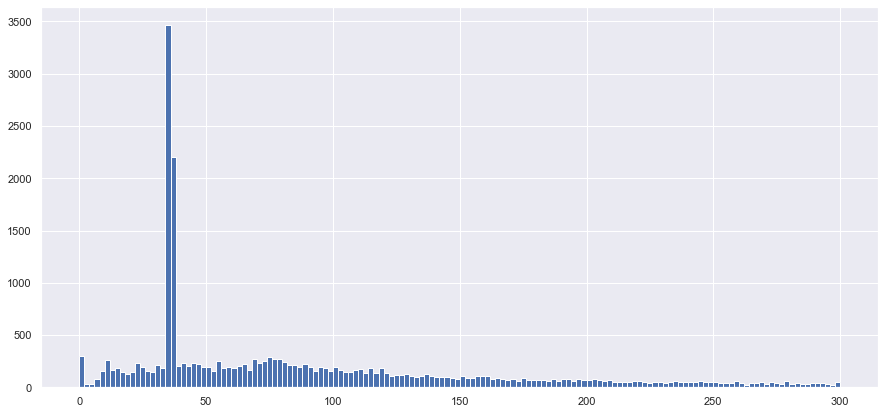

In [ ]:
chats['text_len'].hist(figsize=(15, 7), bins=150, range=(0,300));

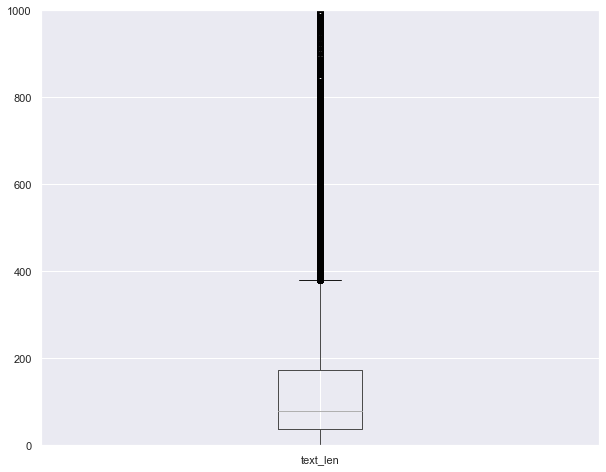

In [ ]:
chats.boxplot('text_len')
plt.ylim(0,1000);

Анализ показал, что длина сообщений неоднородна. Из 37-40 символов состоит около 23% всех сообщений, это самая многочисленная группа. Чаще всего сообщения состоят из символов в диапазоне 37-174.

Изучим значения столбца Количество слов в сообщении.

In [ ]:
chats['text_words'].value_counts(ascending=False)

5      5984
2       877
12      816
11      760
7       754
       ... 
234       1
239       1
337       1
273       1
270       1
Name: text_words, Length: 280, dtype: int64

In [ ]:
chats['text_words'].sort_values(ascending=False).head(20)

18448    989
18449    702
13469    655
8078     600
24935    547
18460    486
15344    451
121      432
10798    419
13053    412
703      407
10189    405
7960     373
14147    359
10785    354
22227    348
564      348
7897     343
370      337
1269     335
Name: text_words, dtype: int64

По аналогии со столбцом Длина сообщений, избавимся от значений, в которых количество слов превышает 100.

In [ ]:
chats['text_words'] = chats.loc[chats['text_words'] < 100, 'text_words']

In [ ]:
chats['text_words'].describe()

count    25498.000000
mean        17.290454
std         17.992646
min          0.000000
25%          5.000000
50%         11.000000
75%         23.000000
max         99.000000
Name: text_words, dtype: float64

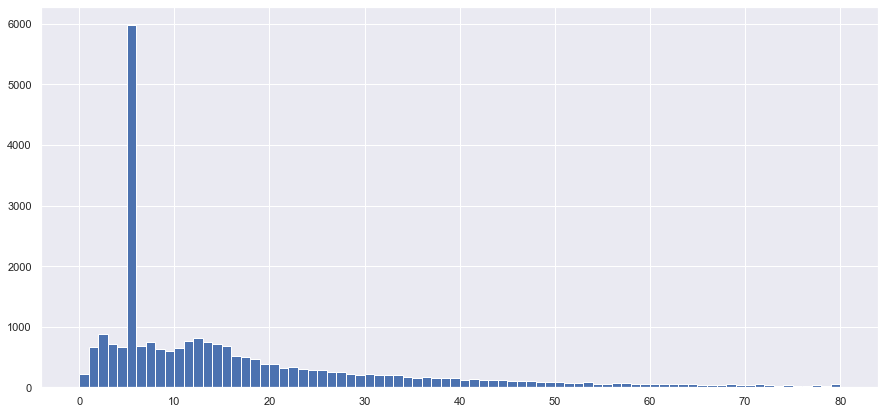

In [ ]:
chats['text_words'].hist(figsize=(15, 7), bins=80, range=(0,80));

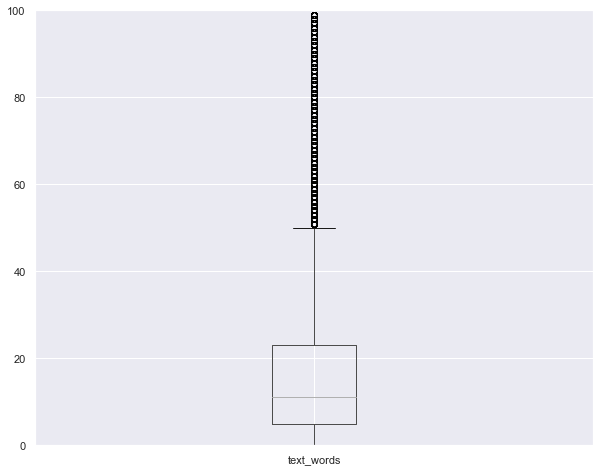

In [ ]:
chats.boxplot('text_words')
plt.ylim(0,100);

Из анализа столбца Количество слов в сообщении можно сделать вывод, что сообщения обычно состоят из 5-22 слов. Очень большая доля сообщений (6000) состоит из 5 слов.

#### Вывод

В ходе обработки данных были выполнены следующие действия:

- Был удален столбец Индекс, потому что он не несет никакой важности для анализа.
- Преобразованы столбцы, хранящие информацию о Дате поста, Дате ответа, Дате треда и Дате файла в формат даты и времени.
- В данных обнаружены пропуски в столбцах: Дата ответа - 91%, Реакции - 84%, Метка действий пользователя - 69%, Факт вхождения в команду Яндекса (?) - 40%, id сообщения - 31%, Дата треда - 31%, id пользователя - 11%.
- В столбце Дата ответа много пропусков (более 23000): возможно большинство сообщений просто остаются без ответа, а возможно это какая-то техническая ошибка. Поэтому пропуски в этом столбце было решено оставить без изменений.
- Пропуски в столбце Reactions скорее всего говорят лишь о том, что пользователь не захотел поставить реакцию на сообщение, поэтому заменим их на значение "0".
- В колонке Subtype сообщения с пропусками, то есть без метки, пометим как "без метки".
- Наберемся смелости выдвинуть предположение, что в столбце Team указана принадлежность к команде Практикума. Поэтому изменим значения в столбце на булевы: если сообщение написано членом команды, вернётся значение True, если нет - False;
- Предположим, что пропуски в столбце id сообщения появляются в том случае, если сообщение имеет какую-нибудь метку действий пользователя, то есть относится к, так называемым "техническим сообщениям". Оставим данные пропуски без изменений;
- Пропуски в столбце Дата треда скорее всего обусловлены тем, что сообщение не имело отношения к треду. Данные пропуски так же оставим без изменений;
- Из таблицы видно, что все сообщения с пропуском в поле Пользователь имеют метку bot_message. Предположительно данные сообщения написаны ботом. Изменим пропуски на значение "bot".
- В ходе обработки дубликатов было выявлено 369 полных дубликата, от которых мы благополучно избавились. Все дубликаты имели метку  bot_message.
- Неявных дубликатов в данных не оказалось.
- Столбец Reactions содержит данные о пользователе, оставившем реакцию, самой реакции и об общем количестве реакций. Было принято решение создать новый столбец и и поместить туда информацию об общем количестве реакций. Столбец получил название reactions_number.
- Столбец Channel так же содержит неоднородную информацию, в которую входит информация о Направлении курса(Аналитика, Инженерия и т.д..), номере когорты и самого названия канала.
- Используя информацию из колонки channel было создано 2 новых столбца: Направление или Название курса (course); и отдельно Название канала (only_channel).
- Анализ значений столбца Длины сообщений говорят о том, что она неоднородна. Есть сообщения, состоящие из 0 символов, а есть и те, в которых почти 11 тысяч. И это реальные сообщения. Из 37-40 символов состоит около 23% всех сообщений, это самая многочисленная группа. Чаще всего сообщения состоят из символов в диапазоне 37-174.
- Из анализа столбца Количество слов в сообщении можно сделать вывод, что сообщения обычно состоят из 5-22 слов. Очень большая доля сообщений (6000) состоит из 5 слов.

### 3. Исследовательский анализ данных

#### Количество реакций с разбивкой по каналам обучения.

In [ ]:
channel_reactions_number = (
    chats.groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)

channel_reactions_number['ratio_%'] = (((channel_reactions_number['reactions_number'] / channel_reactions_number['reactions_number'].sum())) * 100).round(2)

channel_reactions_number

,only_channel,reactions_number,ratio_%
8,projects,7274,30.0
3,exerciser,6556,27.0
11,teamwork,4285,17.0
4,info,3864,16.0
5,library,1019,4.0
1,community,679,3.0
10,teach_me,572,2.0
12,tutorial,155,1.0
6,masterskaya,71,0.0
9,student_feedback,64,0.0


Количество реакций в каналах projects и exerciser составляют 30% и 27% от общего числа реакций в сообщениях.

In [ ]:
# строим столбчатую диаграмму
fig = px.bar(channel_reactions_number.sort_values(by='reactions_number', ascending=True),
             x='reactions_number',
             y='only_channel',
             text='reactions_number'
            )
# оформляем график
fig.update_layout(title='Количество реакций с разбивкой по каналам',
                   xaxis_title='Число реакций',
                   yaxis_title='Канал')
fig.show()

NameError: ignored

Среди лидеров по количеству реакций в сообщениях можно отметить каналы projects (7274 реакции), exerciser (6556) и  teamwork (4285) при общем количестве реакций в 20336 штук.

Самыми скупыми на реакции оказались каналы academ (36 реакций), diqital_professions(31) и  mentors(15).

In [ ]:
chats_grouped = (chats.groupby('only_channel')['reactions_number']
                      .describe()
                      .sort_values(by='count', ascending=False)
                      .reset_index()
                      .head(5)
                )
chats_grouped

,only_channel,count,mean,std,min,25%,50%,75%,max
0,projects,7274.0,0.146274,0.389672,0.0,0.0,0.0,0.0,4.0
1,exerciser,6556.0,0.164735,0.470339,0.0,0.0,0.0,0.0,9.0
2,teamwork,4285.0,0.270945,0.816844,0.0,0.0,0.0,0.0,9.0
3,info,3864.0,0.407609,1.060555,0.0,0.0,0.0,0.0,9.0
4,library,1019.0,0.054956,0.402500,0.0,0.0,0.0,0.0,5.0


Отберем топ-5 каналов по количеству реакций.

In [ ]:
top5_channels_by_reactions = (
    chats.groupby('only_channel')['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number', ascending=False)
    .head(5)
)
top5_channels_by_reactions.columns = ['channel', 'total_reactions']
top5_channels_by_reactions['ratio_%'] = (
                                        (((top5_channels_by_reactions['total_reactions']
                                           /top5_channels_by_reactions['total_reactions']
                                           .sum())) * 100)
                                           .round()
)
top5_channels_by_reactions

,channel,total_reactions,ratio_%
8,projects,7274,32.0
3,exerciser,6556,29.0
11,teamwork,4285,19.0
4,info,3864,17.0
5,library,1019,4.0


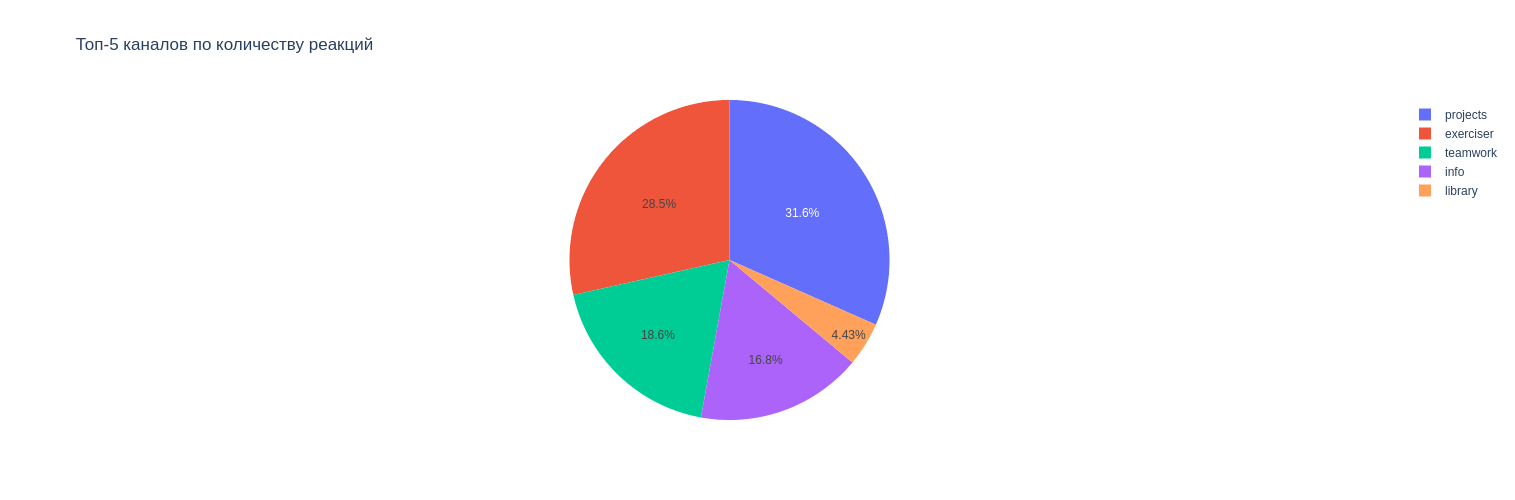

In [ ]:
channels = top5_channels_by_reactions['channel']
total = top5_channels_by_reactions['total_reactions']

fig = go.Figure(data=[go.Pie(labels=channels, values=total)])
fig.update_layout(title='Топ-5 каналов по количеству реакций',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

Топ-5 каналов по количеству реакций: projects (32% от общего числа реакций), exerciser (28,5%), teamwork (19%), info (17%), library (4%).

#### Изучим количество реакций с разбивкой по направлениям обучения.

In [ ]:
courses_by_reactions = (
    chats.groupby('course')['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number', ascending=False)
    .head(5)
)
courses_by_reactions.columns = ['course', 'total_reactions']
courses_by_reactions['ratio_%'] = (
                                   ((courses_by_reactions['total_reactions']
                                   /courses_by_reactions['total_reactions']
                                   .sum()) * 100)
                                   .round()
                                )
courses_by_reactions

,course,total_reactions,ratio_%
0,da,12941,49.0
3,ds,9696,37.0
1,de,1981,8.0
2,dl,1325,5.0
4,sql,207,1.0


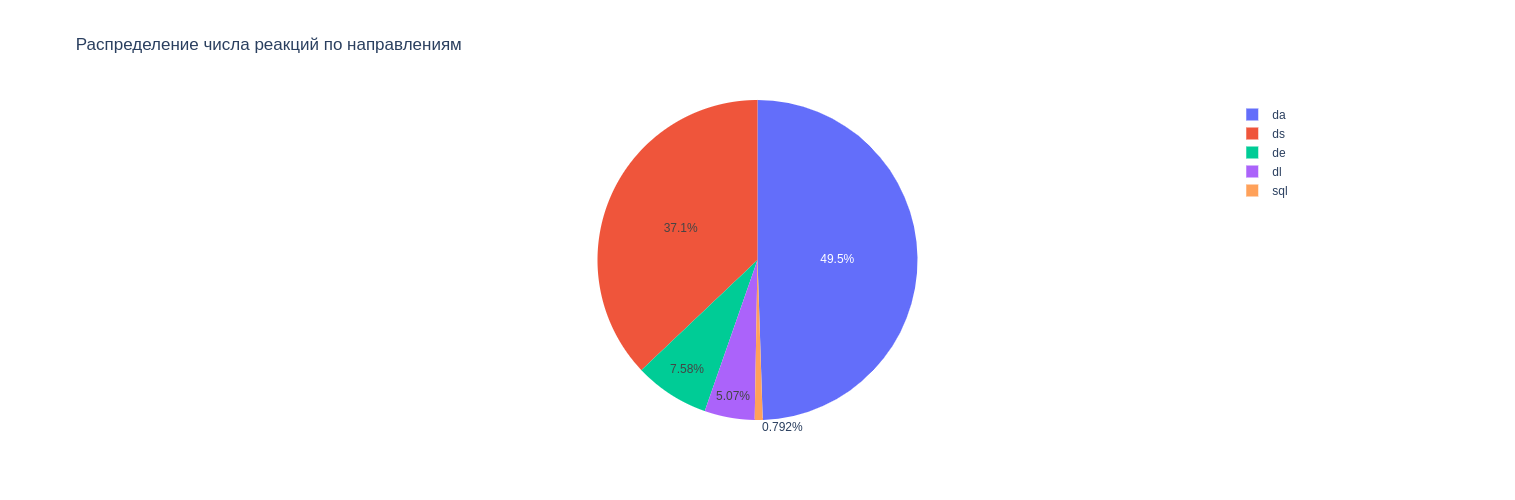

In [ ]:
courses = courses_by_reactions['course']
total = courses_by_reactions['total_reactions']

fig = go.Figure(data=[go.Pie(labels=courses, values=total)])
fig.update_layout(title='Распределение числа реакций по направлениям',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

Почти половина всех реакций приходится на направление Анализа Данных, на втором месте - Data Science с 37% от всех реакций. Меньше всего реакций было поставлено участниками курса SQL.

А теперь посмотрим на распределение реакций по каналам на каждом отдельном курсе.

In [ ]:
# количество реакций по каналам на курсе DA

channel_reactions_number_da = (
    chats.query('course == "da"')
    .groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)
channel_reactions_number_da.columns = ['channel', 'reactions_da']
channel_reactions_number_da

,channel,reactions_da
4,projects,3778
0,exerciser,3715
5,teamwork,2199
1,info,1742
2,library,534
3,mentors,8


На курсе Аналитики Данных реакции чаще ставят в каналах projects, exerciser и teamwork.

In [ ]:
# количество реакций по каналам на курсе DS

channel_reactions_number_ds = (
    chats.query('course == "ds"')
    .groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)
channel_reactions_number_ds.columns = ['channel', 'reactions_ds']
channel_reactions_number_ds

,channel,reactions_ds
5,projects,3046
0,exerciser,2638
6,teamwork,1979
1,info,1396
2,library,377
3,masterskaya,60
4,mentors,1


На курсе Data Science похожая ситуация с реакциями, в лидерах: projects, exerciser и teamwork.

In [ ]:
# количество реакций по каналам на курсе DE

channel_reactions_number_de = (
    chats.query('course == "de"')
    .groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)
channel_reactions_number_de.columns = ['channel', 'reactions_de']
channel_reactions_number_de

,channel,reactions_de
3,info,451
6,projects,450
0,community,246
8,tutorial,155
2,exerciser,143
4,library,108
7,teamwork,47
1,digital_professions,31
5,mentors,6


На курсе Data Engineering реакции чаще ставят в каналах info, projects и community.

In [ ]:
# количество реакций по каналам на курсе DL

channel_reactions_number_dl = (
    chats.query('course == "dl"')
    .groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)
channel_reactions_number_dl.columns = ['channel', 'reactions_dl']
channel_reactions_number_dl

,channel,reactions_dl
4,teach_me,572
1,community,433
2,info,188
3,student_feedback,64
0,academ,36


На курсе Data Lens реакции чаще ставят в каналах teach_me и community.

In [ ]:
# количество реакций по каналам на курсе SQL

channel_reactions_number_sql = (
    chats.query('course == "sql"')
    .groupby(['only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number',ascending=False)
)
channel_reactions_number_sql.columns = ['channel', 'reactions_sql']
channel_reactions_number_sql

,channel,reactions_sql
1,info,87
0,exerciser,60
2,teamwork,60


На курсе SQL реакции чаще ставят в канале info.

#### Количество реакций по каналам в разных направлениях обучения.

In [ ]:
top_channel_list = ['projects', 'exerciser', 'info', 'library', 'teamwork']
channel_course_reactions = (
    chats.query('only_channel in @top_channel_list')
    .groupby(['course','only_channel'])['reactions_number']
    .count()
    .reset_index()
    .sort_values(by='reactions_number', ascending=False)
)
channel_course_reactions.columns = ['course','channel','total_reactions']
channel_course_reactions['ratio_%'] = (
                                   ((channel_course_reactions['total_reactions']
                                   /channel_course_reactions['total_reactions']
                                   .sum()) * 100)
                                   .round()
                                )
channel_course_reactions


,course,channel,total_reactions,ratio_%
3,da,projects,3778,16.0
0,da,exerciser,3715,16.0
14,ds,projects,3046,13.0
11,ds,exerciser,2638,11.0
4,da,teamwork,2199,10.0
15,ds,teamwork,1979,9.0
1,da,info,1742,8.0
12,ds,info,1396,6.0
2,da,library,534,2.0
6,de,info,451,2.0


Видим, что самые активные направления обучения, судя по реакциям, это DA и DS, в каналах projects, exerciser и teamwork.

Посторим тепловую карту, чтобы наглядно увидеть самые "активные" пересечения.

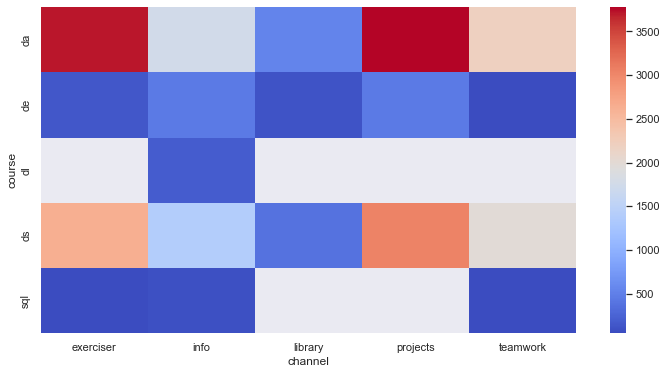

In [ ]:
plt.figure(figsize = (12,6))
data_1 = channel_course_reactions.pivot('course', 'channel', 'total_reactions')
sns.heatmap(data_1,cmap= 'coolwarm');

В абсолютных лидерах -  курс DA каналы projects и exerciser.

#### Посмотрим на топ-5 каналов по количеству реакций в разрезе направлений обучения

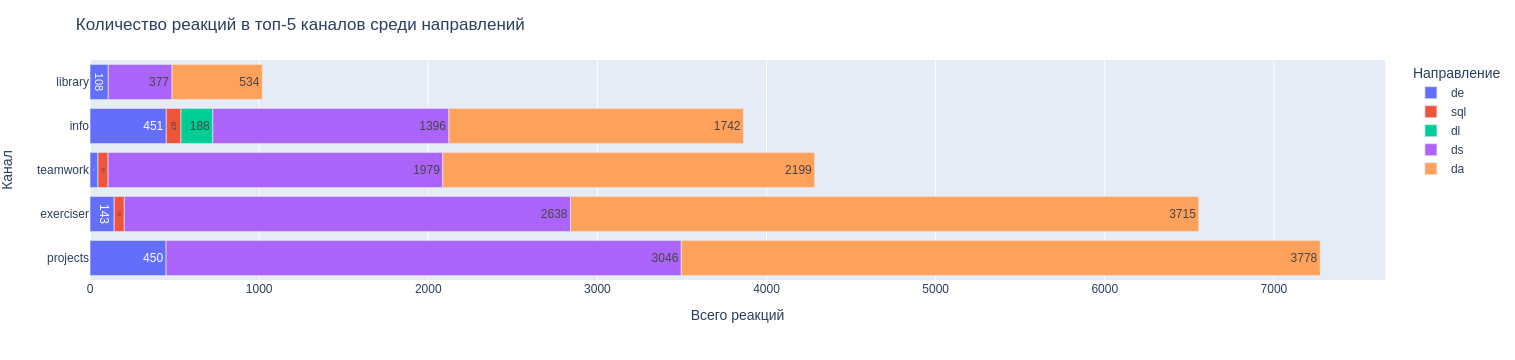

In [ ]:
# строим столбчатую диаграмму
fig = px.bar(channel_course_reactions.sort_values(by='total_reactions', ascending=True),
             x='total_reactions',
             y='channel',
             color='course',
             text='total_reactions'
            )
fig.update_yaxes(categoryorder='total descending')
# оформляем график
fig.update_layout(title='Количество реакций в топ-5 каналов среди направлений',
                   xaxis_title='Всего реакций',
                   yaxis_title='Канал',
                 legend_title='Направление')
fig.show()

Во всех пяти каналах направления DA и DS являются лидерами по количеству реакций.

#### Количество ответов с разбивкой по каналам обучения.

In [ ]:
channel_reply_number = (
    chats.groupby(['only_channel'])['latest_reply']
    .count()
    .reset_index()
    .sort_values(by='latest_reply',ascending=False)
)

channel_reply_number['ratio_%'] = (((channel_reply_number['latest_reply'] / channel_reply_number['latest_reply'].sum())) * 100).round()

channel_reply_number

,only_channel,latest_reply,ratio_%
3,exerciser,616,28.0
11,teamwork,525,24.0
8,projects,446,21.0
4,info,351,16.0
1,community,104,5.0
10,teach_me,104,5.0
6,masterskaya,8,0.0
12,tutorial,8,0.0
5,library,6,0.0
9,student_feedback,4,0.0


Чаще всего отчечают в каналах exerciser, teamwork и projects. Число ответов в этих каналах составляет 73% от всех ответов.

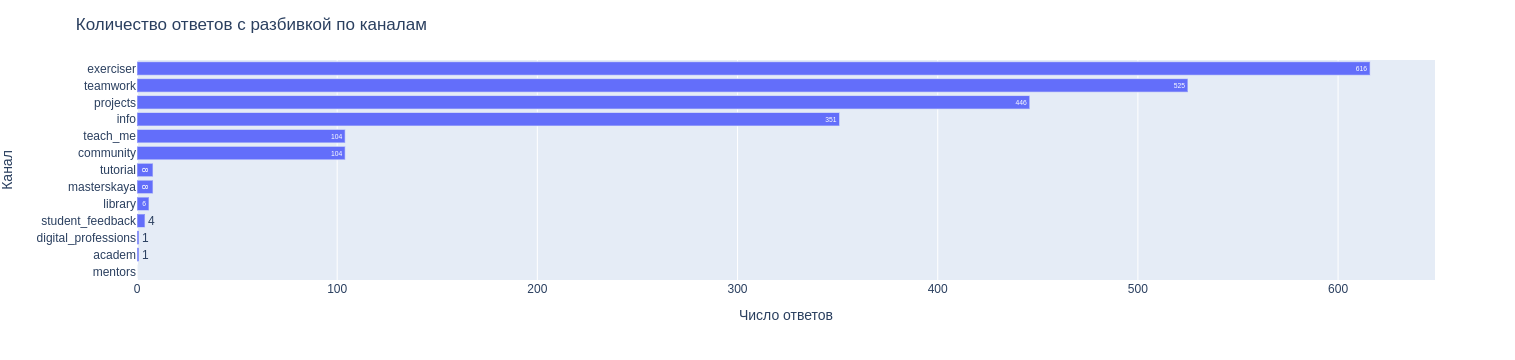

In [ ]:
# строим столбчатую диаграмму
fig = px.bar(channel_reply_number.sort_values(by='latest_reply', ascending=True),
             x='latest_reply',
             y='only_channel',
             text='latest_reply'
            )
# оформляем график
fig.update_layout(title='Количество ответов с разбивкой по каналам',
                   xaxis_title='Число ответов',
                   yaxis_title='Канал')
fig.show()

Из графика четко видны 4 канала-лидера по количеству ответов - exerciser, teamwork, projects и info.

#### Количество ответов с разбивкой по направлениям обучения.

In [ ]:
courses_by_reply = (
    chats.groupby('course')['latest_reply']
    .count()
    .reset_index()
    .sort_values(by='latest_reply', ascending=False)
    .head(5)
)
courses_by_reply.columns = ['course', 'total_replies']
courses_by_reply['ratio_%'] = (
                                   ((courses_by_reply['total_replies']
                                   /courses_by_reply['total_replies']
                                   .sum()) * 100)
                                   .round()
)
courses_by_reply

,course,total_replies,ratio_%
0,da,1136,49.0
3,ds,761,33.0
2,dl,212,9.0
1,de,173,8.0
4,sql,19,1.0


Чаще всего отчечают в на курсах Data Analisys и Data Science. Число ответов в этих каналах составляет 82% от всех ответов.

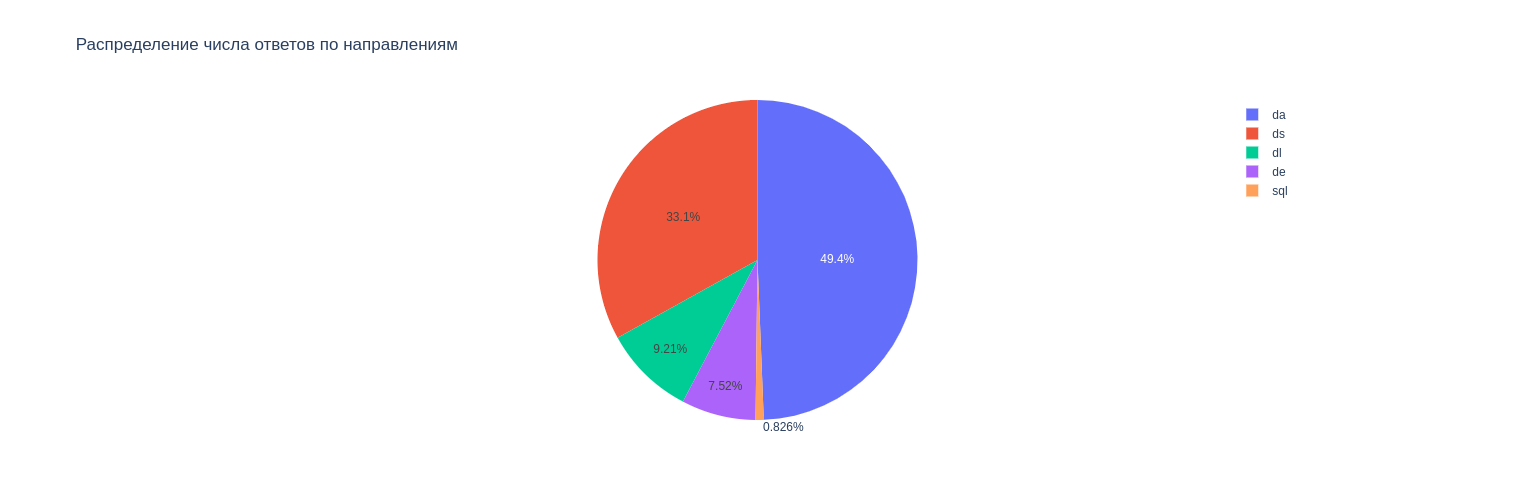

In [ ]:
courses = courses_by_reply['course']
total = courses_by_reply['total_replies']

fig = go.Figure(data=[go.Pie(labels=courses, values=total)])
fig.update_layout(title='Распределение числа ответов по направлениям',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

Чаще всего на сообщения отвечают участники курсов DA (49% от общего количества ответов) и DS (33%).

#### Количество ответов в разных каналах по направлениям обучения.

In [ ]:
top_channel_list_2 = ['teach_me', 'exerciser', 'info', 'exerciser', 'teamwork', 'community']
channel_course_replies = (
    chats.query('only_channel in @top_channel_list_2')
    .groupby(['course','only_channel'])['latest_reply']
    .count()
    .reset_index()
    .sort_values(by='latest_reply', ascending=False)
)
channel_course_replies.columns = ['course','channel','total_replies']
channel_course_replies['ratio_%'] = (
                                   ((channel_course_replies['total_replies']
                                   /channel_course_replies['total_replies']
                                   .sum()) * 100)
                                   .round()
                                )
channel_course_replies


,course,channel,total_replies,ratio_%
0,da,exerciser,401,24.0
2,da,teamwork,265,16.0
12,ds,teamwork,246,14.0
10,ds,exerciser,207,12.0
1,da,info,158,9.0
11,ds,info,138,8.0
9,dl,teach_me,104,6.0
7,dl,community,75,4.0
3,de,community,29,2.0
8,dl,info,25,1.0


Самые активное сочетание курса и канала - DA канал exerciser, в нем публикуется 24% от всех ответов.

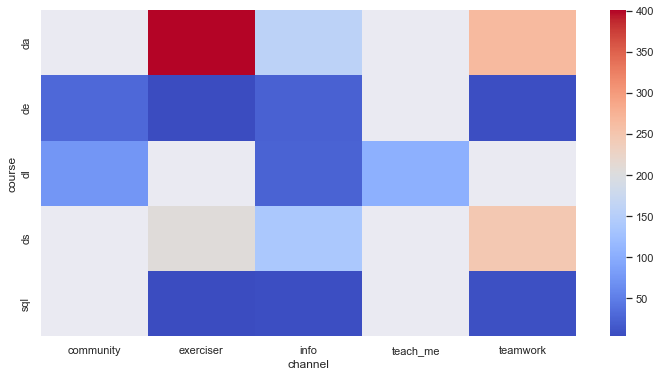

In [ ]:
plt.figure(figsize = (12,6))
data_1 = channel_course_replies.pivot('course', 'channel', 'total_replies')
sns.heatmap(data_1,cmap= 'coolwarm');

Из тепловой карты хорошо видно, что больше всего ответов у DA в канале exerciser (около 400). А вот реже всего отвечают на курсе DE в каналах exerciser и teamwork и на курсе SQL в каналах exerciser и info.

#### Посмотрим на самые популярные каналы по количеству ответов в разрезе направлений обучения

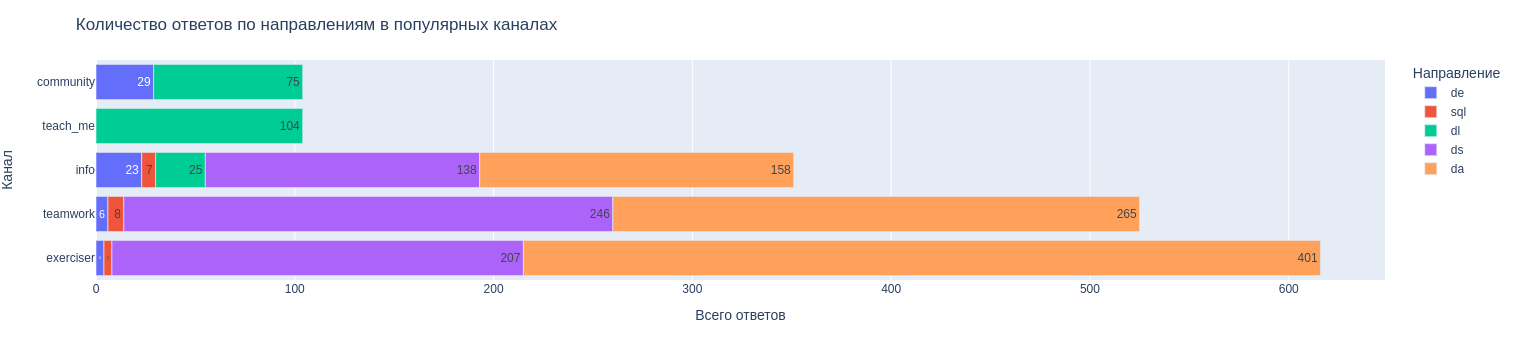

In [ ]:
# строим столбчатую диаграмму
fig = px.bar(channel_course_replies.sort_values(by='total_replies', ascending=True),
             x='total_replies',
             y='channel',
             color='course',
             text='total_replies'
            )
fig.update_yaxes(categoryorder='total descending')
# оформляем график
fig.update_layout(title='Количество ответов по направлениям в популярных каналах',
                   xaxis_title='Всего ответов',
                   yaxis_title='Канал',
                 legend_title='Направление')
fig.show()

Среди популярных каналов лидерами по количеству ответов стали DA, DS и DL.

#### Отберем "успешные посты" и найдем их особенности.

А именно, отфильтруем сообщения, которые не остались без ответа (или на них была поставлена реакция), которые написаны реальными людьми, не ботом, и которые не относятся к,так называемым, "техническим".

In [ ]:
table_4 = chats.loc[chats['latest_reply'].notna() | chats['reactions'] != "0"].query('subtype == "без метки"').query('user != "bot"')
table_4 = table_4[['client_msg_id', 'text_len', 'latest_reply', 'subtype', 'user']].sort_values(by='text_len', ascending=False)
table_4 = table_4[table_4['text_len'].notna()]
table_4

,client_msg_id,text_len,latest_reply,subtype,user
4943,576a6909-5539-4bb1-bd15-9d00330a0b83,999.0,NaT,без метки,U042M96JGEQ
20455,a346d2f3-19a7-49a4-a2fd-70897ca10679,997.0,NaT,без метки,U042WQ0DEKT
5075,d8ba0b15-11af-4397-8b9f-a61b0adbfe66,996.0,NaT,без метки,U042JNEMGV9
13788,29622275-4efd-4c21-bfd6-fb14143a3b36,994.0,2022-11-29 13:52:30,без метки,U03UN9WN0SY
4427,1283d75e-074b-40e1-9998-69684303075a,994.0,NaT,без метки,U042XBJFX17
...,...,...,...,...,...
698,f72124d8-3ef1-434b-84bb-da9fdf6d6504,0.0,NaT,без метки,U03MKQ2N472
23560,d68f4763-9458-474f-8fe4-944ef632041b,0.0,NaT,без метки,U04A5DC809L
8198,9ae46ea5-c5d3-4588-a8ed-13447c428786,0.0,NaT,без метки,U031P6L6SSC
15748,d97e7c27-4608-42ca-b0a2-f401167b97c0,0.0,NaT,без метки,U043SSAQMT2


Теперь посмотрим, какая у большинства таких "успешных" постов длина сообщений.

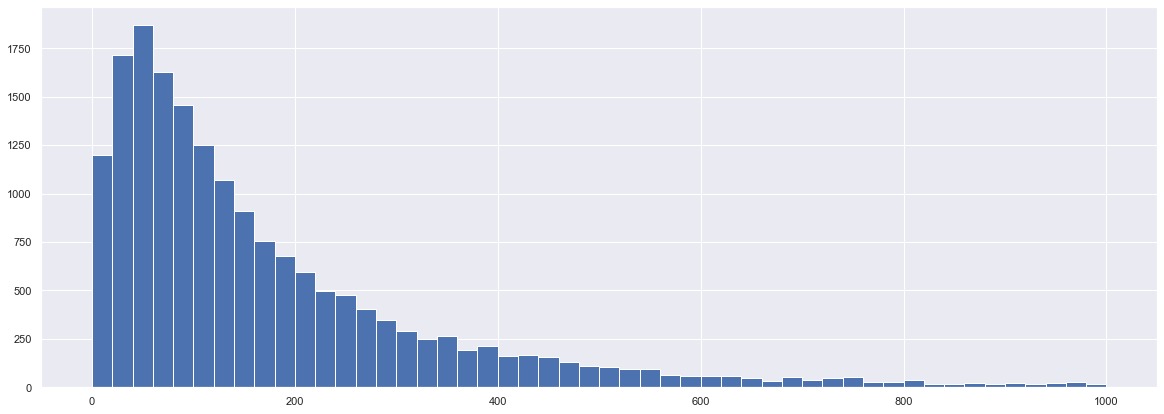

In [ ]:
table_4['text_len'].hist(figsize=(20, 7), bins=50, range=(0,1000));

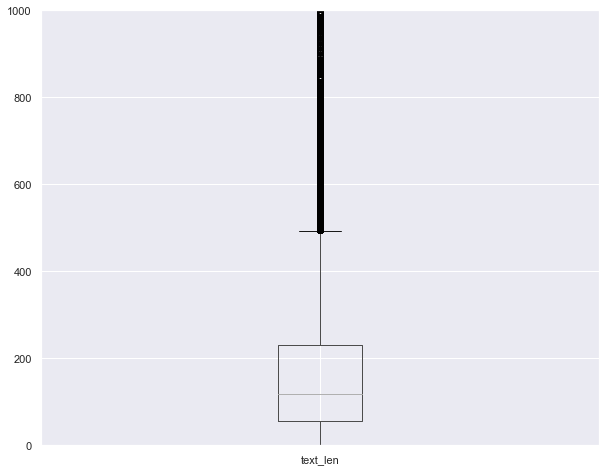

In [ ]:
import matplotlib.pyplot as plt
table_4.boxplot('text_len')
plt.ylim(0,1000);

In [ ]:
щtable_4['text_len'].describe().reset_index()

,index,text_len
0,count,17877.000000
1,mean,173.924596
2,std,172.826059
3,min,0.000000
4,25%,56.000000
5,50%,117.000000
6,75%,231.000000
7,max,999.000000


Как правило на пост отвечают или ставят реакцию, если он состоит из количества символов в диапазоне от 56 до 230, такой особенностью обладает большая половина постов с ответами или реакциями.

#### В какое время публиковать посты, чтобы была лучше обратная связь?

Добавим новые столбцы "Время публикации поста" (ts_time), "Час публикации поста" (ts_hour), "День недели публикации поста" (ts_weekday), а затем "Диапазон" (ts_part_of_the_day), значения в котором разделим на четыре категории: утро, день, вечер, ночь.

In [ ]:
chats['ts_time'] = pd.DatetimeIndex(chats['ts']).time
chats['ts_hour'] = pd.DatetimeIndex(chats['ts']).hour
chats['ts_weekday'] = pd.DatetimeIndex(chats['ts']).weekday
symbols=[0,1,2,3,4,5,6]
names=['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье']
chats['ts_weekday'] = chats['ts_weekday'].replace(symbols, names)

In [ ]:
def ts_part_of_the_day_func(row): # напишем функцию, для деления времени публикации поста на диапазоны:утро, день, вечер, ночь.
    try:
        if 5 <= row < 12:
            return 'утро'
        elif 12 <= row <= 16:
            return 'день'
        elif 16 <= row < 23:
            return 'вечер'
        else:
            return 'ночь'
    except:
        return 'ошибка'

In [ ]:
chats['ts_part_of_the_day'] = chats['ts_hour'].apply(ts_part_of_the_day_func)

In [ ]:
# посмотрим, как распределяется количество ответов на посты в течение дня

cnt_replies_ts_part_of_the_day = (chats.groupby('ts_part_of_the_day')['latest_reply']
                                      .count()
                                      .sort_values(ascending=False)
                                      .reset_index()
                                 )
cnt_replies_ts_part_of_the_day

,ts_part_of_the_day,latest_reply
0,утро,1440
1,день,537
2,вечер,291
3,ночь,35


Утром ответов значительно больше - из общего числа в 2300 сообщений, на утро приходится 1440, а вот на ночное время лишь 35.

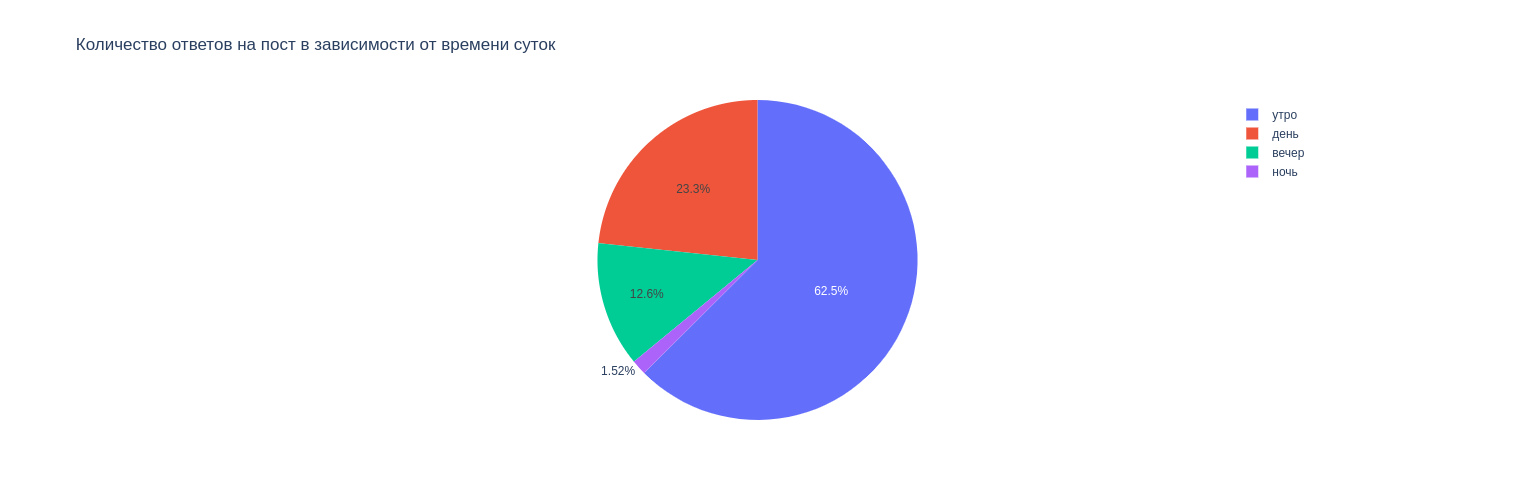

In [ ]:
part_of_the_day= cnt_replies_ts_part_of_the_day['ts_part_of_the_day']
total = cnt_replies_ts_part_of_the_day['latest_reply']

fig = go.Figure(data=[go.Pie(labels=part_of_the_day, values=total)])
fig.update_layout(title='Количество ответов на пост в зависимости от времени суток',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

In [ ]:
# посмотрим, как распределяется количество реакций на посты в течение дня

cnt_reactions_ts_part_of_the_day = (chats.groupby('ts_part_of_the_day')['reactions_number']
                                      .count()
                                      .sort_values(ascending=False)
                                      .reset_index()
                                 )
cnt_reactions_ts_part_of_the_day

,ts_part_of_the_day,reactions_number
0,утро,11684
1,день,9138
2,вечер,4781
3,ночь,561


Реакций на сообщения тоже больше в утренние часы, больше половины от общего числа. Но днём количество реакций не намного меньше - около 40%.

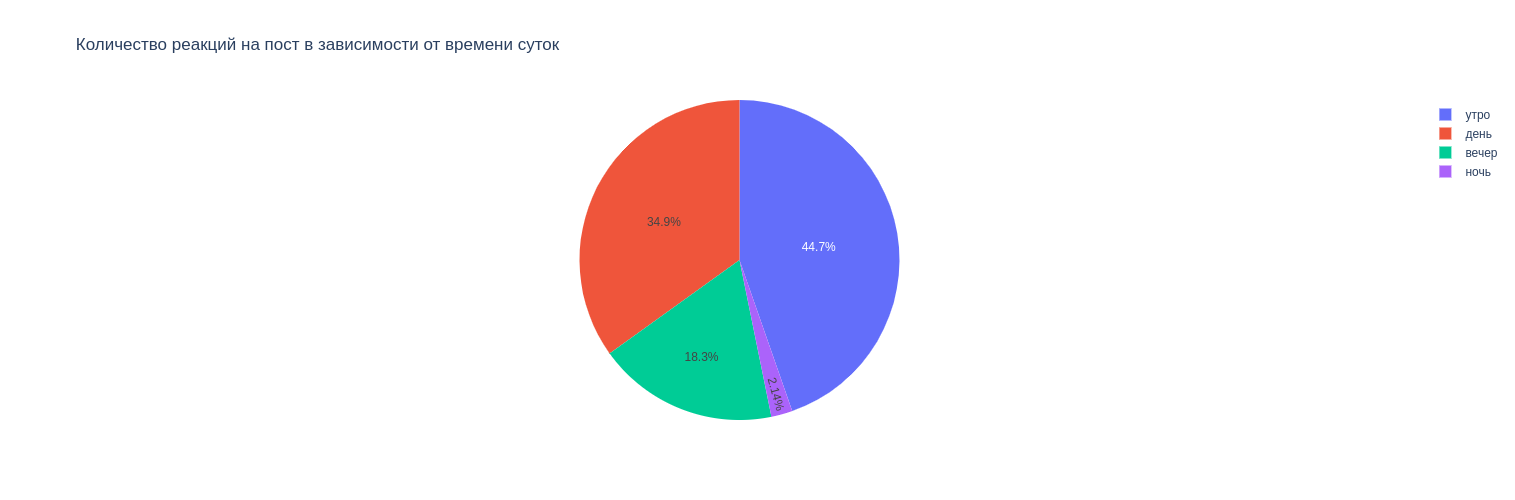

In [ ]:
part_of_the_day= cnt_reactions_ts_part_of_the_day['ts_part_of_the_day']
total = cnt_reactions_ts_part_of_the_day['reactions_number']

fig = go.Figure(data=[go.Pie(labels=part_of_the_day, values=total)])
fig.update_layout(title='Количество реакций на пост в зависимости от времени суток',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

In [ ]:
# посмотрим, как распределяется количество ответов на посты в зависимости от дня недели

cnt_replies_ts_weekday = (chats.groupby('ts_weekday')['latest_reply']
                                      .count()
                                      .sort_values(ascending=False)
                                      .reset_index()
                         )

cnt_replies_ts_weekday

,ts_weekday,latest_reply
0,понедельник,1228
1,вторник,240
2,четверг,214
3,пятница,188
4,воскресенье,182
5,среда,164
6,суббота,87


Чаще всего отвечают на сообщения в понедельники, больше 1200, а это больше половины из всех ответов.

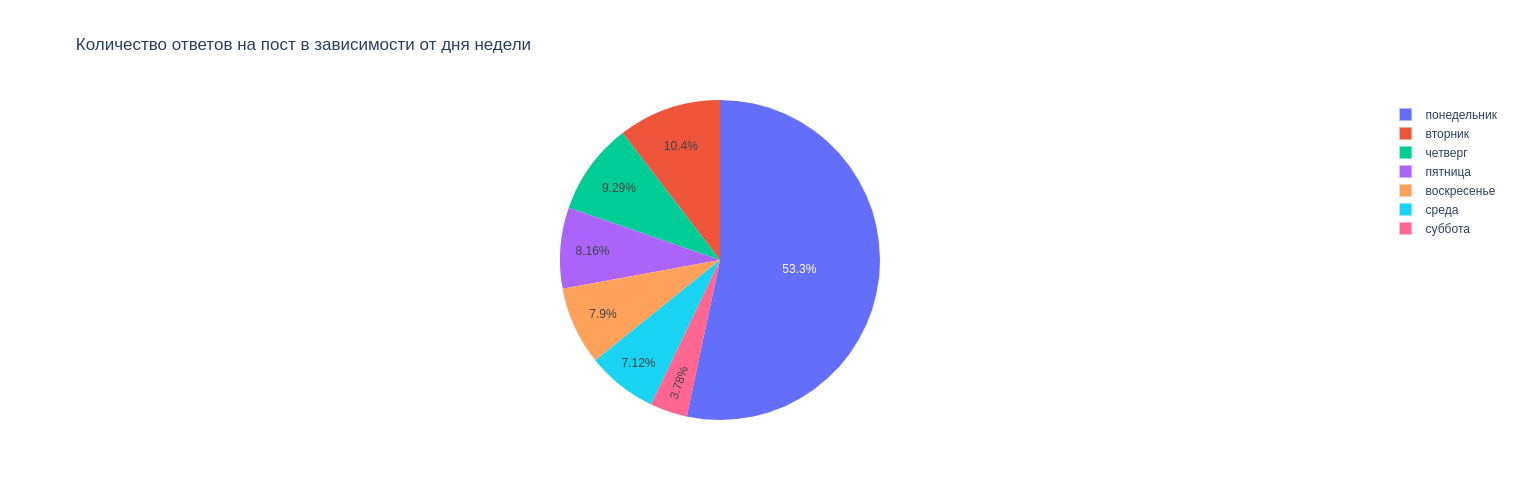

In [ ]:
weekdays= cnt_replies_ts_weekday['ts_weekday']
total = cnt_replies_ts_weekday['latest_reply']

fig = go.Figure(data=[go.Pie(labels=weekdays, values=total)])
fig.update_layout(title='Количество ответов на пост в зависимости от дня недели',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

In [ ]:
# посмотрим, как распределяется количество реакций на посты в зависимости от дня недели

cnt_reactions_ts_weekday = (chats.groupby('ts_weekday')['reactions_number']
                                      .count()
                                      .sort_values(ascending=False)
                                      .reset_index()
                         )

cnt_reactions_ts_weekday

,ts_weekday,reactions_number
0,понедельник,7630
1,вторник,4132
2,четверг,3789
3,среда,3487
4,пятница,3342
5,воскресенье,2182
6,суббота,1602


Реакций на посты тоже больше в понедельник - 33%, а вот на субботу приходится менее 7%.

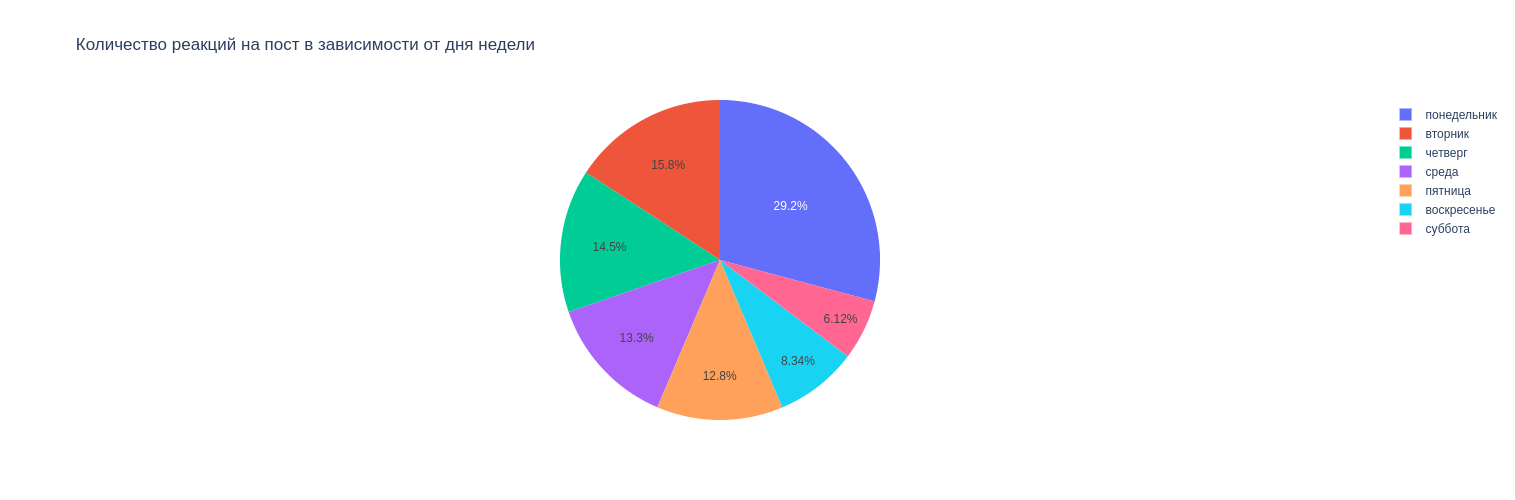

In [ ]:
weekdays= cnt_reactions_ts_weekday['ts_weekday']
total = cnt_reactions_ts_weekday['reactions_number']

fig = go.Figure(data=[go.Pie(labels=weekdays, values=total)])
fig.update_layout(title='Количество реакций на пост в зависимости от дня недели',
                  width=700,
                  height=500,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='',
                                    showarrow=False)])
fig.show()

####  Сколько времени в среднем проходит с момента публикации поста?

Создадим новый столбец с информацией о времени, прошедшем после публикации.

In [ ]:
chats['time_after_post'] = chats['latest_reply'] - chats['ts']

chats['time_after_post'] = ( (pd.to_numeric(chats['time_after_post']
                              .dt.seconds, downcast='integer') / 3600)
                              .round()
                         )

# для удобства переведем значения столбца time_after_post в количество часов

In [ ]:
chats[chats['latest_reply'].notna()].head(5)

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,...,text_len,text_words,course,only_channel,reactions_number,ts_time,ts_hour,ts_weekday,ts_part_of_the_day,time_after_post
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,True,2022-11-28 13:49:23,без метки,data-analysts-bus,2022-11-28,...,297.0,47.0,da,None,0,13:49:23,13,понедельник,день,1.0
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,2022-11-29 08:08:12,2022-11-29 10:56:57,False,2022-11-29 08:08:12,без метки,data-analysts-bus,2022-11-29,...,69.0,12.0,da,None,1,08:08:12,8,вторник,утро,3.0
7,6a730fa5-7934-41f4-96f0-aa04787bce8e,message,U03DZHHUACW,2022-11-29 10:26:46,2022-11-29 12:08:02,True,2022-11-29 10:26:46,без метки,data-analysts-bus,2022-11-29,...,469.0,48.0,da,None,1,10:26:46,10,вторник,утро,2.0
15,97c56c8c-c721-4fa6-870d-f74df7492109,message,U02Q4P6SGBC,2022-11-29 12:02:05,2022-11-29 13:36:28,False,2022-11-29 12:02:05,без метки,data-analysts-bus,2022-11-29,...,784.0,NaN,da,None,0,12:02:05,12,вторник,день,2.0
20,9295b477-0d39-4e73-8c9c-f355cf54773d,message,U03JYMWQLP5,2022-11-30 14:18:35,2022-12-01 12:54:43,False,2022-11-30 14:18:35,без метки,data-analysts-bus,2022-11-30,...,95.0,16.0,da,None,0,14:18:35,14,среда,день,23.0


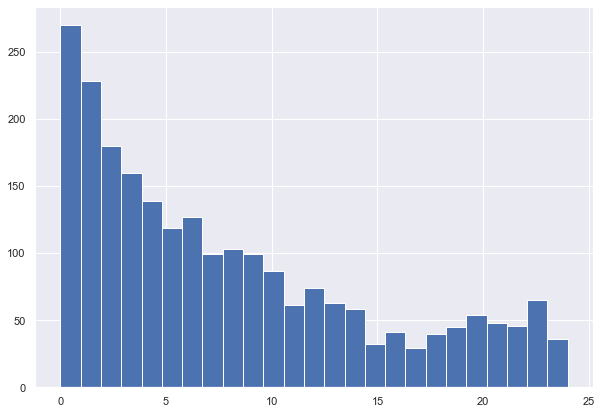

In [ ]:
chats['time_after_post'].hist(figsize=(10, 7), bins=25);

Из гистограммы видно, что между публикацией поста до ответа может пройти от 0 до 24 часов. Чаще всего этот промежуток не превышает 5 часов.

In [ ]:
chats['time_after_post'].value_counts(ascending=False).head(50).reset_index()

,index,time_after_post
0,0.0,270
1,1.0,228
2,2.0,180
3,3.0,160
4,4.0,139
5,6.0,127
6,5.0,119
7,8.0,103
8,9.0,99
9,7.0,99


Почти 12% ответивших на пост, сделали это течение часа. Почти 10% ответивших потребовалось не более 2х часов. В общей сложности около 30% ответивших уложились в 5 часов.

In [ ]:
chats['time_after_post'].describe()

count    2303.000000
mean        7.864525
std         7.017594
min         0.000000
25%         2.000000
50%         6.000000
75%        12.000000
max        24.000000
Name: time_after_post, dtype: float64

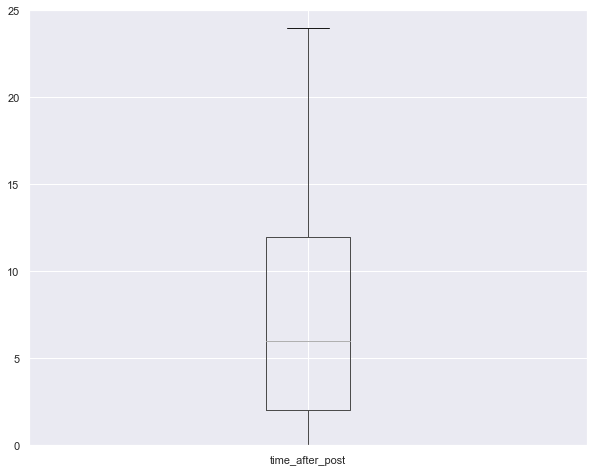

In [ ]:
import matplotlib.pyplot as plt
chats.boxplot('time_after_post')
plt.ylim(0,25);

В основном на ответ требуется от 2х до 12ти часов.

#### Посмотрим, как распределилось количество времени, требуемого на ответ поста в течение суток.

In [ ]:
time_after_reply_data = chats.groupby('ts_part_of_the_day')['time_after_post'].median()
time_after_reply_data.reset_index()

,ts_part_of_the_day,time_after_post
0,вечер,12.0
1,день,4.0
2,ночь,9.0
3,утро,6.0


Вечером, а именно с 16 до 23 часов, в среднем, требуется больше времени на ответ, это 12 часов. Утром в 2 раза меньше - 6 часов.
А вот днём на пост отвечают быстрее всего, в среднем за 4 часа.

#### Теперь посмотрим отдельно на утро и день, сколько в среднем требуется часов на ответ в это время?

In [ ]:
time_after_reply_day = chats.query('ts_part_of_the_day == "день"').groupby('ts_hour')['time_after_post'].median().reset_index()
time_after_reply_day = time_after_reply_day[time_after_reply_day['time_after_post'].notna()]
time_after_reply_day = time_after_reply_day.sort_values(by='time_after_post').head(50)
time_after_reply_day

,ts_hour,time_after_post
1,13,2.0
2,14,3.0
0,12,4.0
3,15,5.0
4,16,14.0


Меньше всего времени на ответ, а именно 2-3 часа уходит на посты, которые публикуются с 13 и 14 часов дня.

In [ ]:
time_after_reply_morning = chats.query('ts_part_of_the_day == "утро"').groupby('ts_hour')['time_after_post'].median().reset_index()
time_after_reply_morning = time_after_reply_morning[time_after_reply_morning['time_after_post'].notna()]
time_after_reply_morning = time_after_reply_morning.sort_values(by='time_after_post').head(50)
time_after_reply_morning

,ts_hour,time_after_post
1,6,3.0
3,8,3.0
5,10,4.0
6,11,4.0
0,5,5.0
4,9,6.0
2,7,7.0


Утром, лучше всего публиковать пост в промежутке с 6 до 9, тогда ответ скорее всего будет в тесчение 3х часов.

### Общий вывод

В ходе аналитики коомуникаций в чатах Яндекс.Практикума в Слаке были найдены интересные особенности, которые в будущем могут помочь повысить активность студентов посредством публикации анонсов в то время, когда на них будет максимальное количество откликов.

#### Особенности активности каналов, когорт, групп:

- среди лидеров по количеству реакций в сообщениях можно отметить каналы projects (7274 реакции), exerciser (6556) и teamwork (4285) при общем количестве реакций в 20336 штук. Самыми скупыми на реакции оказались каналы academ (36 реакций), diqital_professions(31) и mentors(15).
- топ-5 каналов по количеству реакций: projects (32% от общего числа реакций), exerciser (28,5%), teamwork (19%), info (17%), library (4%);
- почти половина всех реакций приходится на направление Data Alalisys, на втором месте - Data Science с 37% от всех реакций. Меньше всего реакций было поставлено участниками курса SQL;
- на курсе Data Alalisys реакции чаще ставят в каналах projects, exerciser и teamwork;
- на курсе Data Science похожая ситуация с реакциями, в лидерах: projects, exerciser и teamwork;
- на курсе Data Engineering реакции чаще ставят в каналах info, projects и community;
- на курсе Data Lens реакции чаще ставят в каналах teach_me и community;
- на курсе SQL реакции чаще ставят в канале info;
- видим, что самые активные направления обучения, судя по реакциям, это DA и DS, в каналах projects, exerciser и teamwork. Самые "активные" пересечения -  курс DA каналы projects и exerciser. Во всех топ-5 каналах (projects, exerciser, teamwork, info, library) направления DA и DS являются лидерами по количеству реакций;
- чаще всего отчечают в каналах exerciser, teamwork и projects. Число ответов в этих каналах составляет 73% от всех ответов. 4 канала-лидера по количеству ответов - exerciser, teamwork, projects и info;
- чаще всего отчечают в на курсах Data Analisys и Data Science. Число ответов в этих каналах составляет 82% от всех ответов, DA (49% от общего количества ответов) и DS (33%). Самые активное сочетание курса и канала по ответам - DA, канал exerciser, в нем публикуется 24% от всех ответов (около 400 из 2300 имеющихся). А вот реже всего отвечают на курсе DE в каналах exerciser и teamwork и на курсе SQL в каналах exerciser и info. Среди популярных каналов лидерами по количеству ответов стали DA, DS и DL;
- как правило на пост отвечают или ставят реакцию, если он состоит из количества символов в диапазоне от 56 до 230, такой особенностью обладает большая половина постов с ответами или реакциями.

#### Особенности поведения студентов в чатах:

- утром ответов значительно больше - из общего числа в 2300 сообщений, на утро приходится 1440, а вот на ночное время лишь 35;
- реакций на сообщения тоже больше в утренние часы, больше половины от общего числа. Но днём количество реакций не намного меньше - около 40%;
- чаще всего отвечают на сообщения в понедельники, больше 1200 сообщений, а это больше половины всех ответов;
- реакций на посты тоже больше в понедельник - 33%, а вот на субботу приходится менее 7%.

#### Время активности студентов:

- между публикацией поста и ответом может пройти от 0 до 24 часов. Чаще всего этот промежуток не превышает 5 часов;
- почти 12% ответивших на пост, сделали это течение часа. Почти 10% ответившим потребовалось не более 2х часов. В общей сложности около 30% ответивших уложились в 5 часов;
- в большинстве случаяев на ответ требуется от 2х до 12ти часов;
- вечером, а именно с 16 до 23 часов, в среднем, требуется больше времени на ответ, около 12 часов. Утром в 2 раза меньше - 6 часов. А вот днём на пост отвечают быстрее всего, в среднем за 4 часа;
- меньше всего времени на ответ, а именно 2-3 часа уходит на посты, которые публикуются с 13 и 14 часов дня. Война войной, а обед по расписанию;
- утром, лучше всего публиковать пост в промежутке с 6 до 9, тогда ответ скорее всего будет в течение 3х часов.

#### Рекомендации для команды Практикума:

- Для большей вероятности ответа или реакции на пост, количество символов в нем должна быть в диапазоне 56-230.
- По возможности самые важные (но не самые срочные) анонсы публикуйте в понедельник; меньше всего для этого дела подойдет суббота.
- Если хотите, чтобы время ответа на пост было минимальным, публикуйте его утром с 8 до 9 или днём с 13-14.
